# Data Science: Module 13
## Practical Challenge: Using Neural Nets to Predict Sharing of Online News Articles
### Alan Leidner & Jacob Goodman
#### Dec, 12 2021
Assignment: https://yu.instructure.com/courses/50398/assignments/191943

# Introduction
Why do people write articles? This question can take many forms, it could be because someone finds something valuable worth sharing with others, or maybe want to create content that will entertain others, or even generate income by publishing articles. So, there is no concrete answer to the question, but one thing we can be certain of is that when people write articles, they want the article to share to as many readers as possible. 

For our project, we are going to be working with a dataset that can be found at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity. 

This dataset was published by mashable which is an entertainment platform.  It contains information such as how many words are in the title, how many unique words in the content, which day the article was published, and title polarity. One can utilize the information presented in the dataset to predict when the good time is to publish an article, or how many words that are in the title would be a good estimator to predict the number of shares for an article. 


This notebook will focus on transforming the `shares` column into a categorical response variable. We will then build multiple Neural Networks to predict those categories, and assess the model performances.

## Importing Dependencies

In [2]:
#Import packages for data frames 
import numpy as np
import pandas as pd

# import pyplot and seaborn for graph creating
import matplotlib.pyplot as plt
import seaborn as sns 

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

#load libraries to transform data
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
from sklearn.preprocessing import power_transform as pt 

#load libraries to perform model analysis
#from sklearn.linear_model import LinearRegression
#from sklearn.feature_selection import RFECV
#import statsmodels.api as sm

#imported to assess multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#This ignores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

# Exploratory Data Analysis <a id='1'></a>
The dataset was loaded into the DAV 6150 Github Repository here: https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M4/M4_Data.csv. This notebook will now load the csv into a Pandas dataframe for analysis.

In [3]:
# read a set of sample data from github. It contains information related to cars and insurance
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M4/M4_Data.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

url 
 timedelta 
 n_tokens_title 
 n_tokens_content 
 n_unique_tokens 
 n_non_stop_words 
 n_non_stop_unique_tokens 
 num_hrefs 
 num_self_hrefs 
 num_imgs 
 num_videos 
 average_token_length 
 num_keywords 
 data_channel_is_lifestyle 
 data_channel_is_entertainment 
 data_channel_is_bus 
 data_channel_is_socmed 
 data_channel_is_tech 
 data_channel_is_world 
 kw_min_min 
 kw_max_min 
 kw_avg_min 
 kw_min_max 
 kw_max_max 
 kw_avg_max 
 kw_min_avg 
 kw_max_avg 
 kw_avg_avg 
 self_reference_min_shares 
 self_reference_max_shares 
 self_reference_avg_sharess 
 weekday_is_monday 
 weekday_is_tuesday 
 weekday_is_wednesday 
 weekday_is_thursday 
 weekday_is_friday 
 weekday_is_saturday 
 weekday_is_sunday 
 is_weekend 
 LDA_00 
 LDA_01 
 LDA_02 
 LDA_03 
 LDA_04 
 global_subjectivity 
 global_sentiment_polarity 
 global_rate_positive_words 
 global_rate_negative_words 
 rate_positive_words 
 rate_negative_words 
 avg_positive_polarity 
 min_positive_polarity 
 max_positive_polarity 
 avg_negative_polarity 
 min_negative_polarity 
 max_negative_polarity 
 title_subjectivity 
 title_sentiment_polarity 
 abs_title_subjectivity 
 abs_title_sentiment_polarity 
 shares 
 
 
 
 
 0 
 http://mashable.com/2013/01/07/amazon-instant-... 
 731.0 
 12.0 
 219.0 
 0.663594 
 1.0 
 0.815385 
 4.0 
 2.0 
 1.0 
 0.0 
 4.680365 
 5.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 496.0 
 496.0 
 496.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.500331 
 0.378279 
 0.040005 
 0.041263 
 0.040123 
 0.521617 
 0.092562 
 0.045662 
 0.013699 
 0.769231 
 0.230769 
 0.378636 
 0.100000 
 0.7 
 -0.350000 
 -0.600 
 -0.200000 
 0.500000 
 -0.187500 
 0.000000 
 0.187500 
 593 
 
 
 1 
 http://mashable.com/2013/01/07/ap-samsung-spon... 
 731.0 
 9.0 
 255.0 
 0.604743 
 1.0 
 0.791946 
 3.0 
 1.0 
 1.0 
 0.0 
 4.913725 
 4.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.799756 
 0.050047 
 0.050096 
 0.050101 
 0.050001 
 0.341246 
 0.148948 
 0.043137 
 0.015686 
 0.733333 
 0.266667 
 0.286915 
 0.033333 
 0.7 
 -0.118750 
 -0.125 
 -0.100000 
 0.000000 
 0.000000 
 0.500000 
 0.000000 
 711 
 
 
 2 
 http://mashable.com/2013/01/07/apple-40-billio... 
 731.0 
 9.0 
 211.0 
 0.575130 
 1.0 
 0.663866 
 3.0 
 1.0 
 1.0 
 0.0 
 4.393365 
 6.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 918.0 
 918.0 
 918.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.217792 
 0.033334 
 0.033351 
 0.033334 
 0.682188 
 0.702222 
 0.323333 
 0.056872 
 0.009479 
 0.857143 
 0.142857 
 0.495833 
 0.100000 
 1.0 
 -0.466667 
 -0.800 
 -0.133333 
 0.000000 
 0.000000 
 0.500000 
 0.000000 
 1500 
 
 
 3 
 http://mashable.com/2013/01/07/astronaut-notre... 
 731.0 
 9.0 
 531.0 
 0.503788 
 1.0 
 0.665635 
 9.0 
 0.0 
 1.0 
 0.0 
 4.404896 
 7.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000000 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.028573 
 0.419300 
 0.494651 
 0.028905 
 0.028572 
 0.429850 
 0.100705 
 0.041431 
 0.020716 
 0.666667 
 0.333333 
 0.385965 
 0.136364 
 0.8 
 -0.369697 
 -0.600 
 -0.166667 
 0.000000 
 0.000000 
 0.500000 
 0.000000 
 1200 
 
 
 4 
 http://mashable.com/2013/01/07/att-u-verse-apps/ 
 731.0 
 13.0 
 1072.0 
 0.415646 
 1.0 
 0.540890 
 19.0 
 19.0 
 20.0 
 0.0 
 4.682836 
 7.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 545.0 
 16000.0 
 3151.157895 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.028633 
 0.028794 
 0.028575 
 0.028572 
 0.885427 
 0.513502 
 0.281003 
 0.074627 
 0.012127 
 0.860215 
 0.139785 
 0.411127 
 0.033333 
 1.0 
 -0.220192 
 -0.500 
 -0.050000 
 0.454545 
 0.136364 
 0.045455 
 0.136364 
 505

## Attribute Information


Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?  

**kw and self_reference** <- the following columns are explained in the original [paper](https://core.ac.uk/download/pdf/55638607.pdf)
>Some of the features are dependent on particularities of the Mashable
service: articles often reference other articles published in the same service; and
articles have meta-data, such as keywords, data channel type and total number
of shares (when considering Facebook, Twitter, Google+, LinkedIn, StumbleUpon and Pinterest). Thus, we extracted the minimum, average and maximum
number of shares (known before publication) of all Mashable links cited in the
article. Similarly, we rank all article keyword average shares (known before publication), in order to get the worst, average and best keywords. For each of these
keywords, we extract the minimum, average and maximum number of shares.    
\- <cite>K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News.</cite>

19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable

**weekday** dummy variables describing the day of the week the article was published 
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?


**weekend** indicator variable for whether an article was published on a weekend 
38. is_weekend: Was the article published on the weekend?

**LDA** attributes explained in source [paper](https://core.ac.uk/download/pdf/55638607.pdf)
>The Latent
Dirichlet Allocation (LDA) algorithm was applied to all Mashable texts
(known before publication) in order to first identify the five top relevant topics and then measure the closeness of current article to such topics  
\- <cite>K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News.</cite>

39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4

**Subjectivity and Polarity** attributes explained in source [paper](https://core.ac.uk/download/pdf/55638607.pdf)
>To compute the subjectivity and polarity sentiment analysis, we adopted the Pattern web mining module (http://www.clips.ua.ac.be/pattern) [Tom De Smedt, Lucas Nijs, and Walter Daelemans. Creative web services with
pattern. In Proceedings of the Fifth International Conference on Computational
Creativity, 2014.], allowing the computation of sentiment polarity and subjectivity scores.  
\- <cite>K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News.</cite>

44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level

**shares** The number of times an article has been shared. this is our Target or what we are trying to predict for new articles.
60. shares: Number of shares (target)

In [4]:
## a few methods will now be called to view summaries of this dataframe
df.shape

(39644, 61)

We have a decent size data, that contains 61 columns and 39644 rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

There are no missing values, and aside from the URL, all features use numbers. Some of these are categorical, but it will still make our data preparation easier

In [6]:
#sanity check to verify that there are certainly no null values
df.isnull().sum().sum()

0

In [7]:
#We are going to look at the statistical analysis of our data
df.describe()

timedelta 
 n_tokens_title 
 n_tokens_content 
 n_unique_tokens 
 n_non_stop_words 
 n_non_stop_unique_tokens 
 num_hrefs 
 num_self_hrefs 
 num_imgs 
 num_videos 
 average_token_length 
 num_keywords 
 data_channel_is_lifestyle 
 data_channel_is_entertainment 
 data_channel_is_bus 
 data_channel_is_socmed 
 data_channel_is_tech 
 data_channel_is_world 
 kw_min_min 
 kw_max_min 
 kw_avg_min 
 kw_min_max 
 kw_max_max 
 kw_avg_max 
 kw_min_avg 
 kw_max_avg 
 kw_avg_avg 
 self_reference_min_shares 
 self_reference_max_shares 
 self_reference_avg_sharess 
 weekday_is_monday 
 weekday_is_tuesday 
 weekday_is_wednesday 
 weekday_is_thursday 
 weekday_is_friday 
 weekday_is_saturday 
 weekday_is_sunday 
 is_weekend 
 LDA_00 
 LDA_01 
 LDA_02 
 LDA_03 
 LDA_04 
 global_subjectivity 
 global_sentiment_polarity 
 global_rate_positive_words 
 global_rate_negative_words 
 rate_positive_words 
 rate_negative_words 
 avg_positive_polarity 
 min_positive_polarity 
 max_positive_polarity 
 avg_negative_polarity 
 min_negative_polarity 
 max_negative_polarity 
 title_subjectivity 
 title_sentiment_polarity 
 abs_title_subjectivity 
 abs_title_sentiment_polarity 
 shares 
 
 
 
 
 count 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 39644.000000 
 
 
 mean 
 354.530471 
 10.398749 
 546.514731 
 0.548216 
 0.996469 
 0.689175 
 10.883690 
 3.293638 
 4.544143 
 1.249874 
 4.548239 
 7.223767 
 0.052946 
 0.178009 
 0.157855 
 0.058597 
 0.185299 
 0.212567 
 26.106801 
 1153.951682 
 312.366967 
 13612.354102 
 752324.066694 
 259281.938083 
 1117.146610 
 5657.211151 
 3135.858639 
 3998.755396 
 10329.212662 
 6401.697580 
 0.168020 
 0.186409 
 0.187544 
 0.183306 
 0.143805 
 0.061876 
 0.069039 
 0.130915 
 0.184599 
 0.141256 
 0.216321 
 0.223770 
 0.234029 
 0.443370 
 0.119309 
 0.039625 
 0.016612 
 0.682150 
 0.287934 
 0.353825 
 0.095446 
 0.756728 
 -0.259524 
 -0.521944 
 -0.107500 
 0.282353 
 0.071425 
 0.341843 
 0.156064 
 3395.380184 
 
 
 std 
 214.163767 
 2.114037 
 471.107508 
 3.520708 
 5.231231 
 3.264816 
 11.332017 
 3.855141 
 8.309434 
 4.107855 
 0.844406 
 1.909130 
 0.223929 
 0.382525 
 0.364610 
 0.234871 
 0.388545 
 0.409129 
 69.633215 
 3857.990877 
 620.783887 
 57986.029357 
 214502.129573 
 135102.247285 
 1137.456951 
 6098.871957 
 1318.150397 
 19738.670516 
 41027.576613 
 24211.332231 
 0.373889 
 0.389441 
 0.390353 
 0.386922 
 0.350896 
 0.240933 
 0.253524 
 0.337312 
 0.262975 
 0.219707 
 0.282145 
 0.295191 
 0.289183 
 0.116685 
 0.096931 
 0.017429 
 0.010828 
 0.190206 
 0.156156 
 0.104542 
 0.071315 
 0.247786 
 0.127726 
 0.290290 
 0.095373 
 0.324247 
 0.265450 
 0.188791 
 0.226294 
 11626.950749 
 
 
 min 
 8.000000 
 2.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 -1.000000 
 0.000000 
 -1.000000 
 0.000000 
 0.000000 
 0.000000 
 -1.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.00

## Univariate Analysis
Column by column EDA




We note that there is a blank space before the name of our response variable. We will remove it, and any other spaces now to prevent formating problems while calling functions.

In [8]:
df.columns = df.columns.str.replace(' ', '')

### Custom EDA Function
We find ourselves turning to the same methods and visualizations for univariate analysis. The following function will be utilized to standardize our EDA and simplify code.

In [9]:
def distbox (i,df , type = 'numeric',normalize=True):
  """ 
  This function is designed to provide distribution statics and visualizations of dataframe columns
  it takes in a column number and dataframe and can return:
   numerical output -
            1. the skewness of the column
            2. the kurtosis or spread
            3. the descriptive statistics from .describe()
            4. a histogram and boxplot
            
  OR categorical -        
            1. countplot
            2. values counts (either count or as percentages)
  """
  #best practice import dependencies in functions
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings 
  warnings.filterwarnings("ignore", category=FutureWarning)
  c = df.iloc[:,i]
  plt.figure(figsize=(8,4))
  if type =='numeric':
    plt.subplot(1,2,1);#Histogram location
    sns.distplot(c);#calls a histogram
    plt.title(df.columns[i]);#adds title
    plt.subplot(1,2,2);#Boxplot location
    sns.boxplot(c);#calls a box and whisket plot
    plt.title(df.columns[i]);#adds title
    print("Skewness: %f" %c.skew()) #Adds Skew value
    # If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
    # If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
    # If the skewness is less than -1 or greater than 1, the data are highly skewed
    print("Kurtosis: %f" %c.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
    # While kurtosis determines the heaviness of the distribution tails.
    # Kurtosis > 3 thin and not spread
    # Kurtosis <3 moderate spread
    print(c.describe()) #Adds summary statistics of the variable


  elif type == 'categorical':
    sns.countplot(c)
    plt.title(df.columns[i]);#adds title
    print(c.value_counts(normalize=normalize))

  print("Nullcount: %f" %c.isnull().sum().sum())
  plt.show() # this will load image to console before executing next line of code

### Shares (TARGET)
Response Variable (indicates # of times an article is shared)

Skewness: 33.963885
Kurtosis: 1832.672657
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64
Nullcount: 0.000000


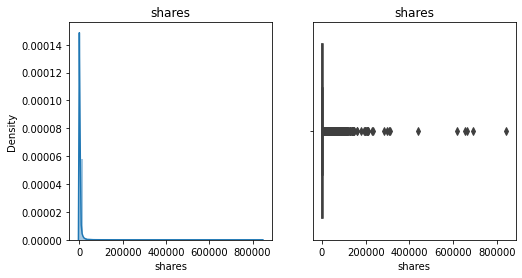

In [10]:
distbox(60,df)

This is very skewed to the right, with some extreme outliers. Let's examine them now.

In [11]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
share_outliers = df[np.abs(df['shares'] - df['shares'].mean() ) > (3 * df['shares'].std() )]
share_outliers.shape

(308, 61)

In [12]:
share_outliers.shares.describe()

While these are clear outliers from the media 1400 shares, they are data points that we will not remove. It is likely that persons analyzing this data set would want to find the values that achieved these unusually positive results.

### url column
This column is the link to the website being shared in the dataset. It acts as a natural index, but is not a predictor in our model as indicated by the attribute information. We can check to see if there are any duplicates though.

In [13]:
df['url'].duplicated().sum()

0

There are no duplicates for us to worry about. We will drop this feature from our model.

### timedelta column

Skewness: 0.120504
Kurtosis: -1.257191
count    39644.000000
mean       354.530471
std        214.163767
min          8.000000
25%        164.000000
50%        339.000000
75%        542.000000
max        731.000000
Name: timedelta, dtype: float64
Nullcount: 0.000000


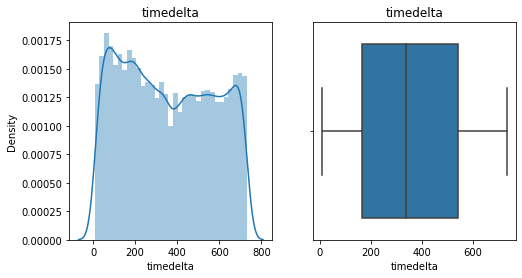

In [14]:
distbox(1,df)

This variable seems relatively well distributed, if bi-model. However, the data attribute information explicitly states that they do not consider the time differential between page publication, and the collection of the study metrics to be predictive. We will drop this feature from our dataset.

### n_tokens_title

Skewness: 0.165320
Kurtosis: -0.000750
count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64
Nullcount: 0.000000


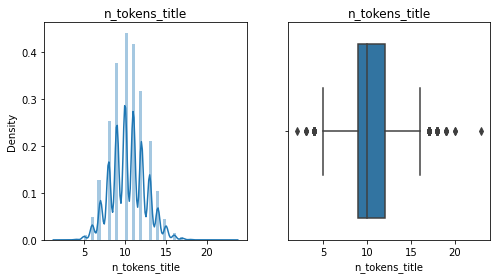

In [15]:
distbox(2,df)

This feature is the number of words in the article title. It seems well distributed and normal. No further data manipulation is needed.

### n_tokens_content

Skewness: 2.945422
Kurtosis: 19.478412
count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64
Nullcount: 0.000000


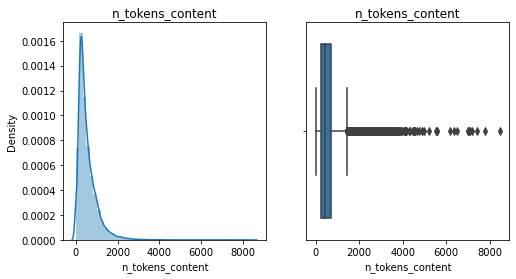

In [16]:
distbox(3,df)

Number of words in the article content. This has a number of outliers, skewing right.

It is also weird that some articles have no words, though they may just contain a picture or video. We know from above that they at least have titles.

We will standardize these values.

### n_unique_tokens

Skewness: 198.655116
Kurtosis: 39523.832001
count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name: n_unique_tokens, dtype: float64
Nullcount: 0.000000


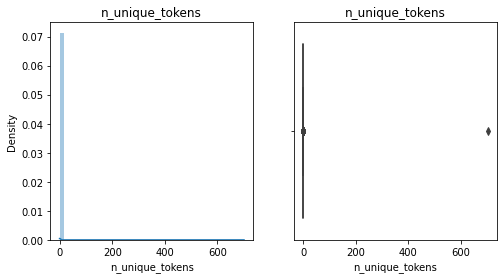

In [17]:
distbox(4,df)

This is the rate of unique words in the content. This has extreme outliers, which we will look at now.

In [18]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
n_unique_tokens_outliers = df[np.abs(df['n_unique_tokens'] - df['n_unique_tokens'].mean() ) > (3 * df['n_unique_tokens'].std() )]
n_unique_tokens_outliers.shape

(1, 61)

This has 1 extreme outlier, which we will examine.

In [19]:
print(df[df.n_unique_tokens == df.n_unique_tokens.max()])

                                                     url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...      142.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037             9.0            1570.0            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
31037                     650.0       11.0            10.0      51.0   

       num_videos  average_token_length  num_keywords  \
31037         0.0              4.696178           7.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
31037                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
31037                  0.0                     0.0                   0.0   

       data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
31037                    0.0        -1.0       778.0  143.714286     231

From the url field, and the total word count doubling the unique word count, we suppose that this article either is a list of foreign words or may include a foreign translation. Either way, we believe this feature can have a significantly higher chance of being predictive in our model if we drop this row during our data preparation step.

### n_non_stop_words

Skewness: 198.792445
Kurtosis: 39560.294950
count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64
Nullcount: 0.000000


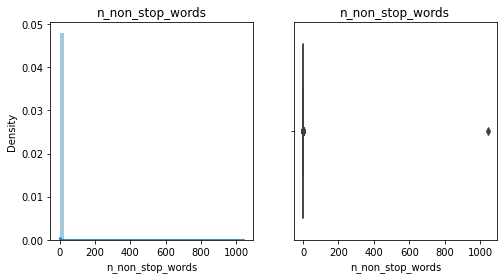

In [20]:
distbox(5,df)

Stop words are "the words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language"*

Non-stop words would then be unique words. This feature seems to suffer from the same problem as n_unique_tokens, which makes sense. Let's check to make sure.

*https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

In [21]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
n_non_stop_words_outliers = df[np.abs(df['n_non_stop_words'] - df['n_non_stop_words'].mean() ) > (3 * df['n_non_stop_words'].std() )]
n_non_stop_words_outliers.shape

(1, 61)

In [22]:
print(df[df.n_non_stop_words == df.n_non_stop_words.max()])

                                                     url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...      142.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037             9.0            1570.0            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
31037                     650.0       11.0            10.0      51.0   

       num_videos  average_token_length  num_keywords  \
31037         0.0              4.696178           7.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
31037                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
31037                  0.0                     0.0                   0.0   

       data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
31037                    0.0        -1.0       778.0  143.714286     231

The same article from above is impacting the number of non stop words, which we would expect from "unique" words. Our intention to drop this row is reinforced.

### n_non_stop_unique_tokens

Skewness: 198.443294
Kurtosis: 39467.693708
count    39644.000000
mean         0.689175
std          3.264816
min          0.000000
25%          0.625739
50%          0.690476
75%          0.754630
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64
Nullcount: 0.000000


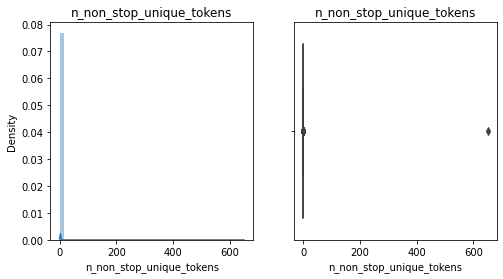

In [23]:
distbox(6,df)

Rate of unique non-stop words in the content. This suffers from the same outlier row.

### num_hrefs

Skewness: 4.013495
Kurtosis: 35.506333
count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64
Nullcount: 0.000000


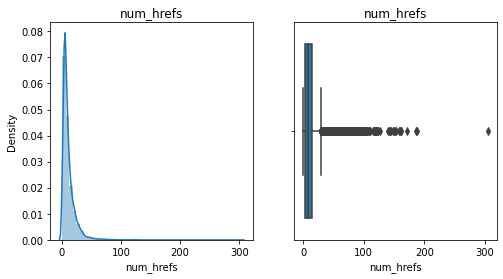

In [24]:
distbox(7,df)

Number of links in the article. It is right skewed like our response variable, and may be predictive.

In [25]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
num_hrefs_outliers = df[np.abs(df.num_hrefs - df.num_hrefs.mean() ) > (3 * df.num_hrefs.std() )]
num_hrefs_outliers.shape

(731, 61)

There are 871 outliers in the rightskewed model. This will benefit from normalization, and possibly standardization.

### num_self_hrefs

Skewness: 5.172751
Kurtosis: 56.171456
count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_hrefs, dtype: float64
Nullcount: 0.000000


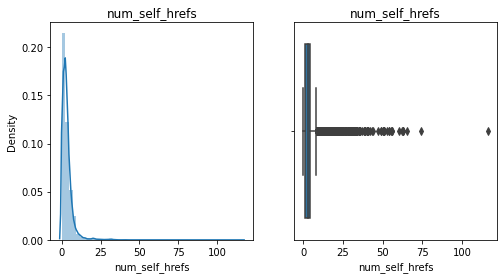

In [26]:
distbox(8,df)

Number of links to other articles published by Mashable. I would expect these to be counted in the num_hrefs feature as well.

This feature is skewed and should be normalized and possibly standardized.

### num_imgs

Skewness: 3.946596
Kurtosis: 24.525746
count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64
Nullcount: 0.000000


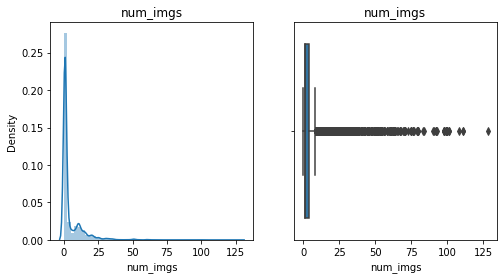

In [27]:
distbox(9,df)

This feature is the number of images in an article. It is right skewed. It should be normalized and standardized.

### num_videos

Skewness: 7.019533
Kurtosis: 74.075414
count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64
Nullcount: 0.000000


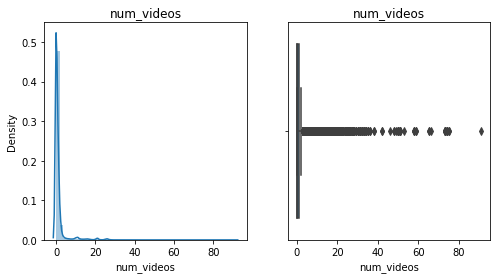

In [28]:
distbox(10,df)

This feature is the number of videos in an article. It is right skewed. It should be normalized and standardized.

### average_token_length

Skewness: -4.576012
Kurtosis: 22.180450
count    39644.000000
mean         4.548239
std          0.844406
min          0.000000
25%          4.478404
50%          4.664082
75%          4.854839
max          8.041534
Name: average_token_length, dtype: float64
Nullcount: 0.000000


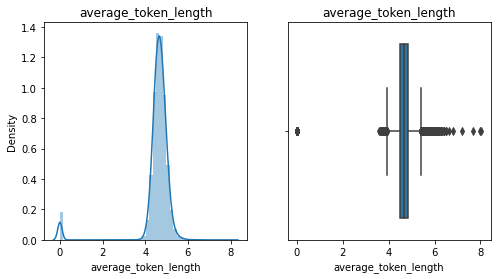

In [29]:
distbox(11,df)

This feature is the average length of the words in the content. The zero values are concerning here, though there are articles that have no words.

In [30]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
zero_avg_token = df.loc[df['average_token_length'] == 0]
print(zero_avg_token.shape)
zero_avg_token.head()

(1181, 61)


url 
 timedelta 
 n_tokens_title 
 n_tokens_content 
 n_unique_tokens 
 n_non_stop_words 
 n_non_stop_unique_tokens 
 num_hrefs 
 num_self_hrefs 
 num_imgs 
 num_videos 
 average_token_length 
 num_keywords 
 data_channel_is_lifestyle 
 data_channel_is_entertainment 
 data_channel_is_bus 
 data_channel_is_socmed 
 data_channel_is_tech 
 data_channel_is_world 
 kw_min_min 
 kw_max_min 
 kw_avg_min 
 kw_min_max 
 kw_max_max 
 kw_avg_max 
 kw_min_avg 
 kw_max_avg 
 kw_avg_avg 
 self_reference_min_shares 
 self_reference_max_shares 
 self_reference_avg_sharess 
 weekday_is_monday 
 weekday_is_tuesday 
 weekday_is_wednesday 
 weekday_is_thursday 
 weekday_is_friday 
 weekday_is_saturday 
 weekday_is_sunday 
 is_weekend 
 LDA_00 
 LDA_01 
 LDA_02 
 LDA_03 
 LDA_04 
 global_subjectivity 
 global_sentiment_polarity 
 global_rate_positive_words 
 global_rate_negative_words 
 rate_positive_words 
 rate_negative_words 
 avg_positive_polarity 
 min_positive_polarity 
 max_positive_polarity 
 avg_negative_polarity 
 min_negative_polarity 
 max_negative_polarity 
 title_subjectivity 
 title_sentiment_polarity 
 abs_title_subjectivity 
 abs_title_sentiment_polarity 
 shares 
 
 
 
 
 893 
 http://mashable.com/2013/01/23/actual-facebook... 
 715.0 
 10.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 10.0 
 0.0 
 0.0 
 7.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 217.0 
 1200.0 
 542.500000 
 0.0 
 51900.0 
 16928.571429 
 0.0 
 3647.272727 
 1923.430603 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.191383 
 0.028703 
 0.179282 
 0.572047 
 0.028586 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.550000 
 -0.500000 
 0.050000 
 0.500000 
 2500 
 
 
 917 
 http://mashable.com/2013/01/23/fitness-gadget-... 
 715.0 
 8.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 10.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 217.0 
 2000.0 
 582.285714 
 0.0 
 51900.0 
 16080.000000 
 0.0 
 2939.239130 
 1596.149445 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.020362 
 0.133522 
 0.020019 
 0.020554 
 0.805543 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000000 
 0.000000 
 0.500000 
 0.000000 
 1700 
 
 
 1062 
 http://mashable.com/2013/01/25/data-vs-nature-... 
 713.0 
 12.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 9.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 217.0 
 2500.0 
 669.000000 
 0.0 
 51900.0 
 17255.555556 
 0.0 
 4380.000000 
 2328.023284 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.532843 
 0.022387 
 0.260606 
 0.023187 
 0.160977 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000000 
 0.000000 
 0.500000 
 0.000000 
 4500 
 
 
 1121 
 http://mashable.com/2013/01/26/infographics-ma... 
 712.0 
 10.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 7.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 217.0 
 1700.0 
 611.000000 
 0.0 
 51900.0 
 13628.571429 
 0.0 
 4408.000000 
 2332.097082 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 1.0 
 0.885229 
 0.028718 
 0.028587 
 0.028866 
 0.028599 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.066667 
 0.033333 
 0.433333 
 0.033333 
 6800 
 
 
 1312 
 http://mashable.com/2013/01/29/social-tv-chart... 
 709.0 
 14.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 10.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 217.0 
 1700.0 
 517.800000 
 440.0 
 51900.0 
 17628.000000 
 440.0 
 4423.333333 
 2305.412167 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.020977 
 0.020356 
 0.020075 
 0.918569 
 0.020023 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.283333 
 0.266667 
 0.216667 
 0.266667 
 1000

The number of articles with a zero avg token is concerning, though at least some of them have other content. It does not need to be standardized or normalized.

### num_keywords

Skewness: -0.147251
Kurtosis: -0.805897
count    39644.000000
mean         7.223767
std          1.909130
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: num_keywords, dtype: float64
Nullcount: 0.000000


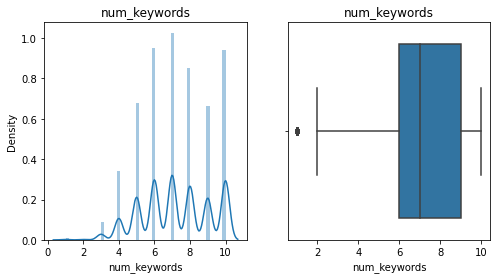

In [31]:
distbox(12,df)

This feature measures the number of keywords in the metadata of an article. These act as tags for the article. The distribution here is relatively normal. It seems there are a few articles that have no keywords, but that isn't very concerning.

### Data Channels
We will explore these categorical features as if they were not already dummied.

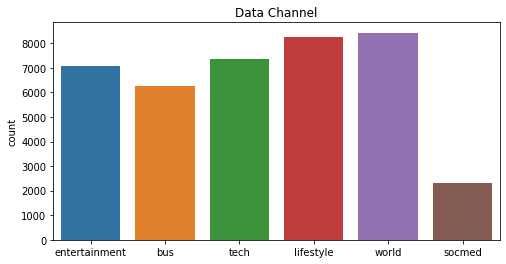

In [32]:
j= 13 # starting column
h= 19 # ending column 
#assigning columns to a new variable
i= df.iloc[:,j:h]
# creating sum column to check for multiple values
i['sum'] = i.sum(axis=1)
# no mulitple values found droping columning and merging values to one column 
i.drop(columns='sum')
dedummied = i.idxmax(axis=1)

#parsing out category
dedummied = dedummied.str.split('_').apply(lambda x : x[-1])


plt.figure(figsize=(8,4))
#plt.subplot(1,2,1);#Histogram location
plt.title('Data Channel');
sns.countplot(dedummied);
#plt.subplot(1,2,2);#Boxplot location
#sns.boxplot();
#plt.title(df.columns[j]);
#print("Skewness: %f" %dedummied.skew()) #Adds Skew value
#print(i.describe()) #Adds summary statistics of the variable
dedummied.describe()


The Categorical dummy columns represented here: 
* data_channel_is_lifestyle: Is data channel 'Lifestyle'?
* data_channel_is_entertainment: Is data channel 'Entertainment'?
* data_channel_is_bus: Is data channel 'Business'?
* data_channel_is_socmed: Is data channel 'Social Media'?
* data_channel_is_tech: Is data channel 'Tech'?
* data_channel_is_world: Is data channel 'World'?

Every article is categorized into one of these channels. If we had more time we would ensure that 'socmed' articles were evenly represented in the testing and validating subsets of our models, though we aren't overly worried about that at this time.

### kw_min_min

Skewness: 2.374947
Kurtosis: 3.660003
count    39644.000000
mean        26.106801
std         69.633215
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64
Nullcount: 0.000000


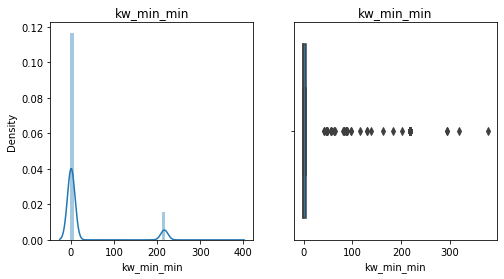

In [33]:
distbox(19,df)

It isn't clear what this feature represents;  we believe that this finds the keywords on the article, sums the total number of shares for each article tagged with that keyword, and then selects the keyword with the lowest total sum. The feature then displays the lowest recorded share count for any article with that keyword. The majority of the values are -1 though, and it isn't clear what that would represent here. Nevertheless, the distribution is skewed  to the right and would benefit from standardization and normalization.

### kw_max_min

Skewness: 35.328434
Kurtosis: 2100.070758
count     39644.000000
mean       1153.951682
std        3857.990877
min           0.000000
25%         445.000000
50%         660.000000
75%        1000.000000
max      298400.000000
Name: kw_max_min, dtype: float64
Nullcount: 0.000000


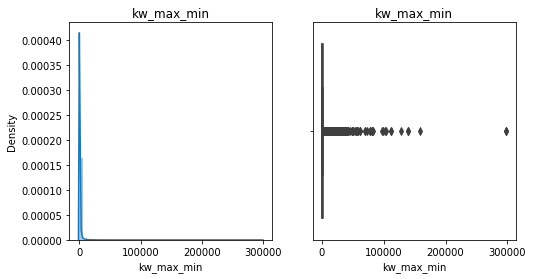

In [34]:
distbox(20,df)

This feature seems to measure the greatest number of shares of articles sharing the worst performing keyword on the article in question. It would benefit from normalization and standardization.

### kw_avg_min

Skewness: 31.306108
Kurtosis: 1592.244353
count    39644.000000
mean       312.366967
std        620.783887
min         -1.000000
25%        141.750000
50%        235.500000
75%        357.000000
max      42827.857143
Name: kw_avg_min, dtype: float64
Nullcount: 0.000000


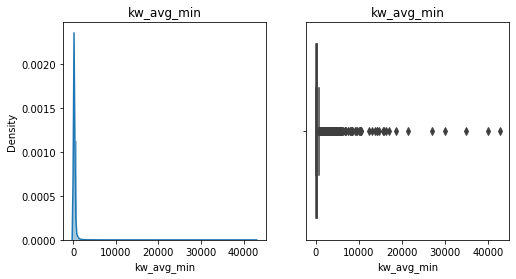

In [35]:
distbox(21,df)

This feature seems to be a measure of the average number of shares of articles sharing the worst performing keyword to the article in question. It isn't clear what the -1 here represents either. The feature would benefit from normalization and standardization. 

### kw_min_max

Skewness: 10.386372
Kurtosis: 123.432109
count     39644.000000
mean      13612.354102
std       57986.029357
min           0.000000
25%           0.000000
50%        1400.000000
75%        7900.000000
max      843300.000000
Name: kw_min_max, dtype: float64
Nullcount: 0.000000


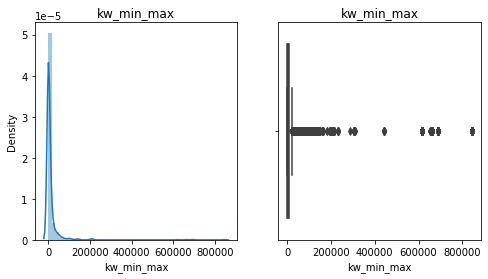

In [36]:
distbox(22,df)

This feature seems to be a measure of the lowest number of shares of articles sharing the best performing keyword on the article in question. It would benefit from normalization and standardization.

### kw_max_max

Skewness: -2.644982
Kurtosis: 5.723851
count     39644.000000
mean     752324.066694
std      214502.129573
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name: kw_max_max, dtype: float64
Nullcount: 0.000000


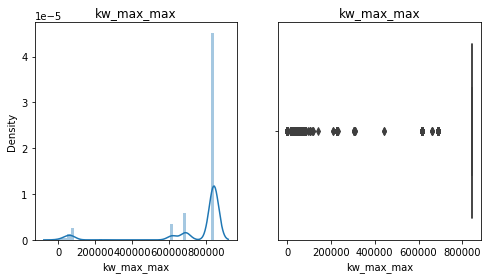

In [37]:
distbox(23,df)

This feature seems to be a measure of the highest number of shares of articles sharing the best performing keyword on the article in question. It would benefit from normalization and standardization.

### kw_avg_max

Skewness: 0.624310
Kurtosis: 0.830521
count     39644.000000
mean     259281.938083
std      135102.247285
min           0.000000
25%      172846.875000
50%      244572.222223
75%      330980.000000
max      843300.000000
Name: kw_avg_max, dtype: float64
Nullcount: 0.000000


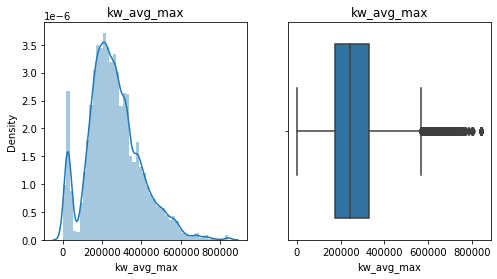

In [38]:
distbox(24,df)

This feature seems to be a measure of the average number of shares of articles sharing the best performing keyword on the article in question. It is relatively normal, but  would benefit from standardization.

### kw_min_avg

Skewness: 0.467976
Kurtosis: -1.126440
count    39644.000000
mean      1117.146610
std       1137.456951
min         -1.000000
25%          0.000000
50%       1023.635611
75%       2056.781032
max       3613.039819
Name: kw_min_avg, dtype: float64
Nullcount: 0.000000


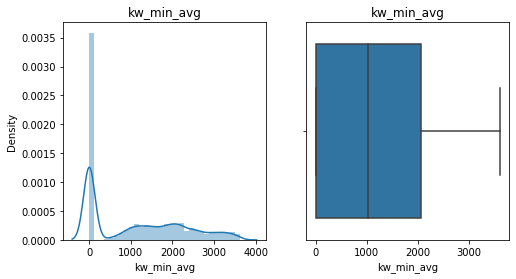

In [39]:
distbox(25,df)

This feature seems to be a measure of the minimum number of shares of articles sharing the most average performing keyword on the article in question. It is unclear what an "average" keyword would mean in this context. We will normalize it to keep it in line with the other keyword metrics.

### kw_max_avg

Skewness: 16.411670
Kurtosis: 481.926512
count     39644.000000
mean       5657.211151
std        6098.871957
min           0.000000
25%        3562.101631
50%        4355.688836
75%        6019.953968
max      298400.000000
Name: kw_max_avg, dtype: float64
Nullcount: 0.000000


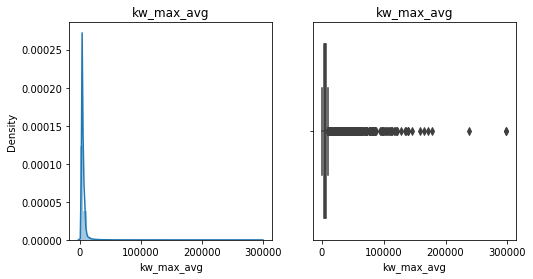

In [40]:
distbox(26,df)

This feature seems to be a measure of the greatest number of shares of articles sharing the most average performing keyword on the article in question. It would benefit from normalization and standardization.

### kw_avg_avg

Skewness: 5.760177
Kurtosis: 100.586108
count    39644.000000
mean      3135.858639
std       1318.150397
min          0.000000
25%       2382.448566
50%       2870.074878
75%       3600.229564
max      43567.659946
Name: kw_avg_avg, dtype: float64
Nullcount: 0.000000


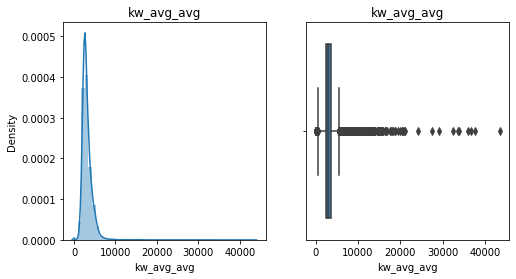

In [41]:
distbox(27,df)

This feature seems to be a measure of the average number of shares of articles sharing the most average performing keyword on the article in question. We will normalize and standardize this feature.

### self_reference_min_shares

Skewness: 26.264364
Kurtosis: 864.891126
count     39644.000000
mean       3998.755396
std       19738.670516
min           0.000000
25%         639.000000
50%        1200.000000
75%        2600.000000
max      843300.000000
Name: self_reference_min_shares, dtype: float64
Nullcount: 0.000000


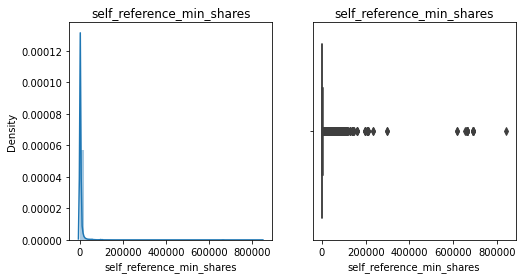

In [42]:
distbox(28,df)

Min. shares of referenced articles in Mashable. In other words; if the article references other Mashable articles, what is the number of shares of the least shared referenced article. The feature should be normalized and standardized.

### self_reference_max_shares

Skewness: 13.870849
Kurtosis: 224.161748
count     39644.000000
mean      10329.212662
std       41027.576613
min           0.000000
25%        1100.000000
50%        2800.000000
75%        8000.000000
max      843300.000000
Name: self_reference_max_shares, dtype: float64
Nullcount: 0.000000


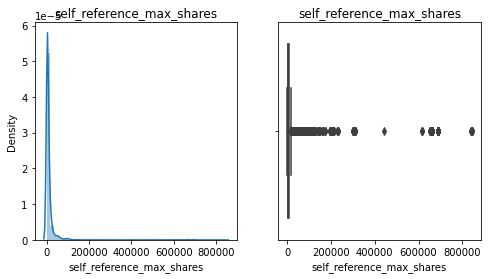

In [43]:
distbox(29,df)

The maximum shares of referenced articles in Mashable; ie if the article references other Mashable articles, what is the number of shares of the most shared referenced article. It should be normalized and standardized.

### self_reference_avg_sharess

Skewness: 17.914093
Kurtosis: 428.499441
count     39644.000000
mean       6401.697580
std       24211.332231
min           0.000000
25%         981.187500
50%        2200.000000
75%        5200.000000
max      843300.000000
Name: self_reference_avg_sharess, dtype: float64
Nullcount: 0.000000


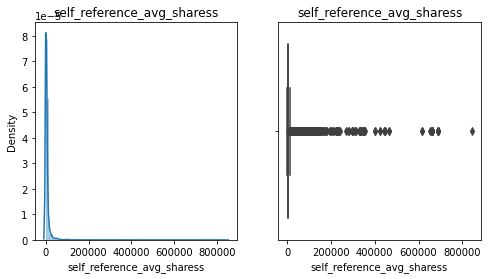

In [44]:
distbox(30,df)

Average shares of referenced articles in Mashable; ie if the article references other Mashable articles, what is the average number of shares of the referenced articles. It should be normalized and standardized. It has an "extra" s at the end of the column name. We aren't sure if this is a mistake, and will not fix the name.

### Days of the week 
We will analyze these features as if they were not already dummied.

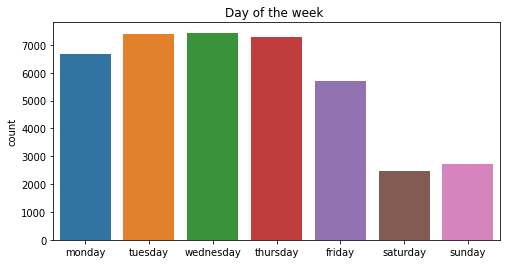

In [45]:
j= 31 # choosing monday as starting column
h= 38 # choosing is_weekend asending column 

i= df.iloc[:,j:h]#assigning columns to a new variable

i['sum'] = i.sum(axis=1)# creating sum column to check for multiple values

i.drop(columns='sum')# no mulitple values found. droping columning and merging values to one column 
dedummied = i.idxmax(axis=1)

dedummied = dedummied.str.split('_').apply(lambda x : x[-1])#parsing out category


plt.figure(figsize=(8,4))
plt.title('Day of the week ');
sns.countplot(dedummied);

The Categorical dummy columns represented here: 
31.  weekday_is_monday: Was the article published on a Monday?
32.  weekday_is_tuesday: Was the article published on a Tuesday?
33.  weekday_is_wednesday: Was the article published on a Wednesday?
34.  weekday_is_thursday: Was the article published on a Thursday?
35.  weekday_is_friday: Was the article published on a Friday?
36.  weekday_is_saturday: Was the article published on a Saturday?
37.  weekday_is_sunday: Was the article published on a Sunday?

We can see a significant drop of articles being posted on weekends. If it wasn't already created in the next column we would recommend the creation of an indicator variable.

### is_weekend

Skewness: 2.188500
Kurtosis: 2.789674
count    39644.000000
mean         0.130915
std          0.337312
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_weekend, dtype: float64
Nullcount: 0.000000


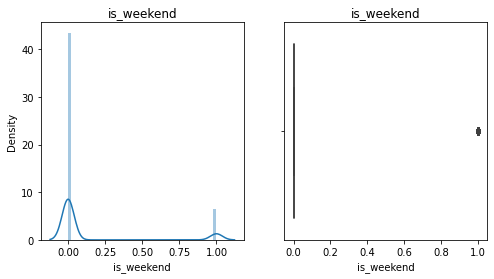

In [46]:
distbox(38,df)

This doesn't give us any information that we didn't have already. we would expect this feature to be dropped, or to drop each individual day feature.

### LDA_00

Skewness: 1.567463
Kurtosis: 1.061099
count    39644.000000
mean         0.184599
std          0.262975
min          0.000000
25%          0.025051
50%          0.033387
75%          0.240958
max          0.926994
Name: LDA_00, dtype: float64
Nullcount: 0.000000


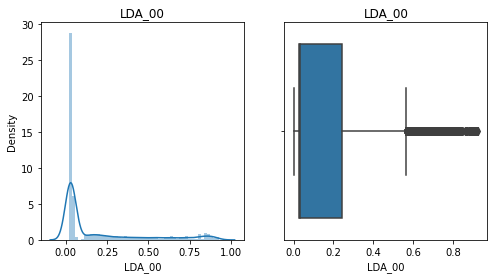

In [47]:
distbox(39,df)

As described in the attribute information section, this feature is a score of closeness to a calculated measure. We aren't exactly clear on what this is, but know how to analyze it regardless. This score is standardized, but not normalized.

### LDA_01

Skewness: 2.086722
Kurtosis: 3.345604
count    39644.000000
mean         0.141256
std          0.219707
min          0.000000
25%          0.025012
50%          0.033345
75%          0.150831
max          0.925947
Name: LDA_01, dtype: float64
Nullcount: 0.000000


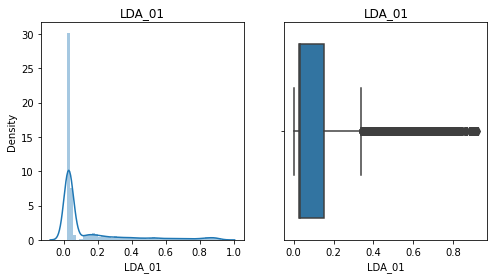

In [48]:
distbox(40,df)

This score is standardized, but not normalized.

### LDA_02

Skewness: 1.311695
Kurtosis: 0.261859
count    39644.000000
mean         0.216321
std          0.282145
min          0.000000
25%          0.028571
50%          0.040004
75%          0.334218
max          0.919999
Name: LDA_02, dtype: float64
Nullcount: 0.000000


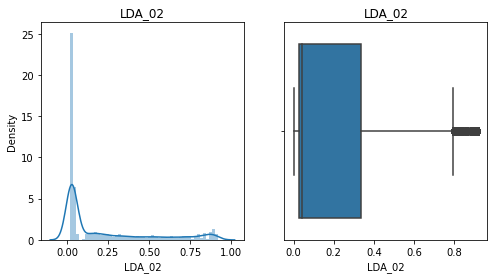

In [49]:
distbox(41,df)

This score is standardized, but not normalized.

### LDA_03

Skewness: 1.238716
Kurtosis: -0.029652
count    39644.000000
mean         0.223770
std          0.295191
min          0.000000
25%          0.028571
50%          0.040001
75%          0.375763
max          0.926534
Name: LDA_03, dtype: float64
Nullcount: 0.000000


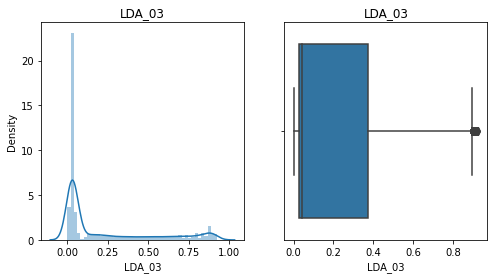

In [50]:
distbox(42,df)

This score is standardized, but not normalized.

### LDA_04

Skewness: 1.173129
Kurtosis: -0.081489
count    39644.000000
mean         0.234029
std          0.289183
min          0.000000
25%          0.028574
50%          0.040727
75%          0.399986
max          0.927191
Name: LDA_04, dtype: float64
Nullcount: 0.000000


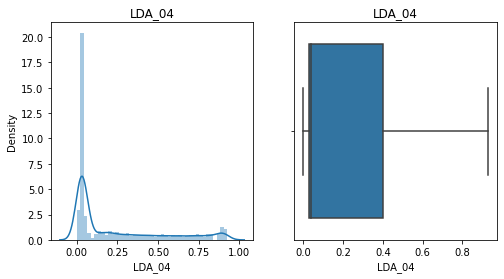

In [51]:
distbox(43,df)

This score is standardized, but not normalized.

### global_subjectivity

Skewness: -1.372689
Kurtosis: 4.611593
count    39644.000000
mean         0.443370
std          0.116685
min          0.000000
25%          0.396167
50%          0.453457
75%          0.508333
max          1.000000
Name: global_subjectivity, dtype: float64
Nullcount: 0.000000


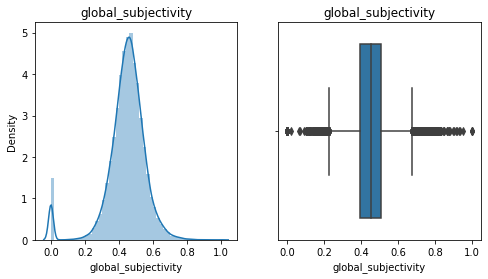

In [52]:
distbox(44,df)

This column scores an article how subjective (vs objective) an article is. This seems normally distributed, with a small spike of zero values, which would represent fully "factual" articles. We do not believe that data preparation is needed.

### global_sentiment_polarity

Skewness: 0.105457
Kurtosis: 1.509932
count    39644.000000
mean         0.119309
std          0.096931
min         -0.393750
25%          0.057757
50%          0.119117
75%          0.177832
max          0.727841
Name: global_sentiment_polarity, dtype: float64
Nullcount: 0.000000


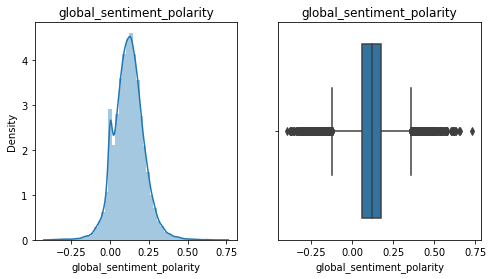

In [53]:
distbox(45,df)

This variable is an analysis of "public opinion" as calculated from extracted and weighted text. It seems gaussian, and we expect a high polarity to be strongly predictive of the number of shares. However, I might expect a more controversial variable to be shared even more (think flame wars). If there is no variable that directly measures this controversial score, we will create one if time allows.

### global_rate_positive_words

Skewness: 0.323047
Kurtosis: 1.019329
count    39644.000000
mean         0.039625
std          0.017429
min          0.000000
25%          0.028384
50%          0.039023
75%          0.050279
max          0.155488
Name: global_rate_positive_words, dtype: float64
Nullcount: 0.000000


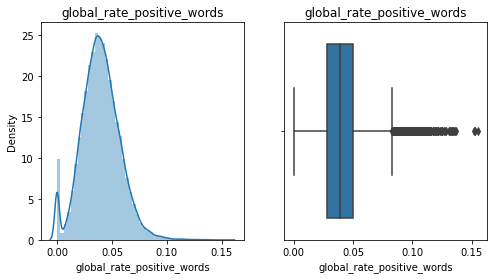

In [54]:
distbox(46,df)

Global rate positive words columns gives us the rate of positive words in the content. The distribution seems equal however there is a spike at 0. We do not believe data preparation is needed.

### global_rate_negative_words

Skewness: 1.491917
Kurtosis: 6.975001
count    39644.000000
mean         0.016612
std          0.010828
min          0.000000
25%          0.009615
50%          0.015337
75%          0.021739
max          0.184932
Name: global_rate_negative_words, dtype: float64
Nullcount: 0.000000


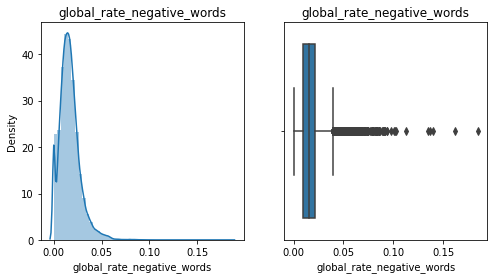

In [55]:
distbox(47,df)

Global rate negative words gives us the rate of negative words that are in the content. It seems that most of our values are distributed closer to zero, hence why our mean value is low. It may very well be linked with some articles that have unique content like graphs or videos without any words. We do not believe any data preparation is needed.

### rate_positive_words

Skewness: -1.423106
Kurtosis: 3.275239
count    39644.000000
mean         0.682150
std          0.190206
min          0.000000
25%          0.600000
50%          0.710526
75%          0.800000
max          1.000000
Name: rate_positive_words, dtype: float64
Nullcount: 0.000000


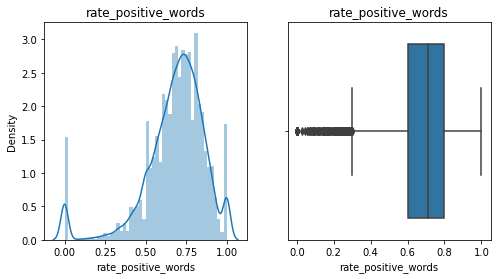

In [56]:
distbox(48,df)

Rate positive words are simply words among non-neutral tokens. We can state that the values here are normally distributed and gaussian.

### rate_negative_words

Skewness: 0.407241
Kurtosis: 0.521587
count    39644.000000
mean         0.287934
std          0.156156
min          0.000000
25%          0.185185
50%          0.280000
75%          0.384615
max          1.000000
Name: rate_negative_words, dtype: float64
Nullcount: 0.000000


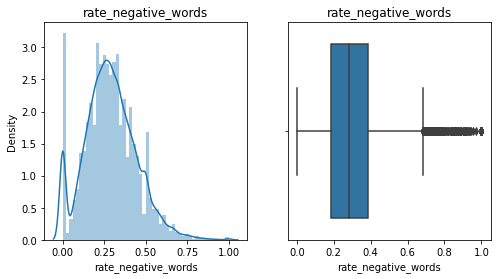

In [57]:
distbox(49,df)

Rate Negative words are negative words among non-neutral tokens, and they seem to have equal distribution. There is a spike at zero which may be linked to articles that have unique content such as images or videos and don't contain many words. We do not believe data preparation is needed.

### avg_positive_polarity

Skewness: -0.724795
Kurtosis: 3.380852
count    39644.000000
mean         0.353825
std          0.104542
min          0.000000
25%          0.306244
50%          0.358755
75%          0.411428
max          1.000000
Name: avg_positive_polarity, dtype: float64
Nullcount: 0.000000


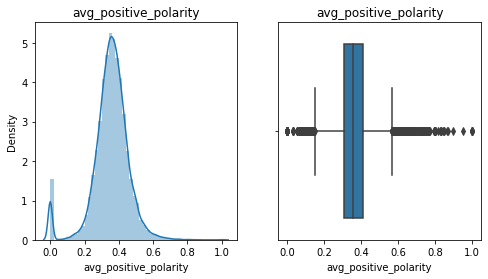

In [58]:
distbox(50,df)

Again there is a small spike at zero, and it is evenly distributed values. That spike at zero could be because the content contains videos. No data preparation is needed.

### min_positive_polarity

Skewness: 3.040468
Kurtosis: 17.417103
count    39644.000000
mean         0.095446
std          0.071315
min          0.000000
25%          0.050000
50%          0.100000
75%          0.100000
max          1.000000
Name: min_positive_polarity, dtype: float64
Nullcount: 0.000000


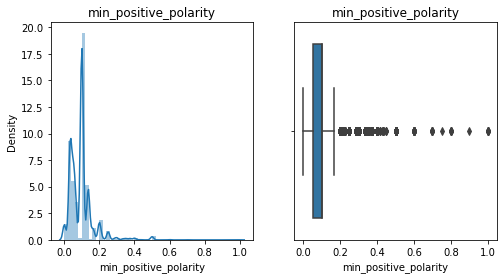

In [59]:
distbox(51,df)

This column contains the minimum polarity of positive words, values are within 0 and 1 range, with most of the words near mean value. No data preparation is needed.

### max_positive_polarity

Skewness: -0.939756
Kurtosis: 0.662354
count    39644.000000
mean         0.756728
std          0.247786
min          0.000000
25%          0.600000
50%          0.800000
75%          1.000000
max          1.000000
Name: max_positive_polarity, dtype: float64
Nullcount: 0.000000


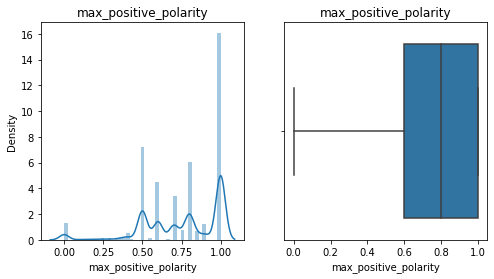

In [60]:
distbox(52,df)

This column contains maximum polarity of positive words, the values are within 0 and 1 range. We do not believe data preparation is needed.

### avg_negative_polarity

Skewness: -0.551644
Kurtosis: 2.369672
count    39644.000000
mean        -0.259524
std          0.127726
min         -1.000000
25%         -0.328383
50%         -0.253333
75%         -0.186905
max          0.000000
Name: avg_negative_polarity, dtype: float64
Nullcount: 0.000000


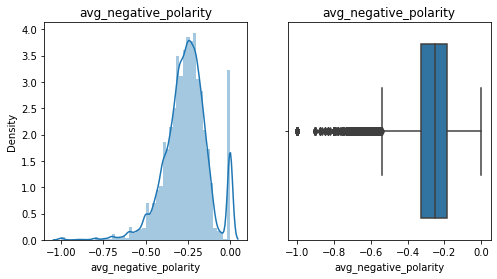

In [61]:
distbox(53,df)

This column contains average polarity of negative words. The values are lower than 0 so we can state that this represents negative sentiment. No data preparation is needed.

### min_negative_polarity

Skewness: -0.073155
Kurtosis: -0.826522
count    39644.000000
mean        -0.521944
std          0.290290
min         -1.000000
25%         -0.700000
50%         -0.500000
75%         -0.300000
max          0.000000
Name: min_negative_polarity, dtype: float64
Nullcount: 0.000000


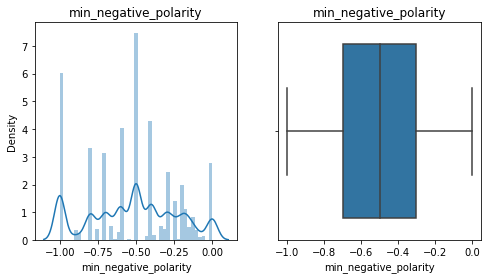

In [62]:
distbox(54,df)

This variable also has values that range from -1 to 0. The mean value is at .52, however there are fewer spikes at different values. We can state that values are relatively uniform. 

### max_negative_polarity

Skewness: -3.459747
Kurtosis: 19.567565
count    39644.000000
mean        -0.107500
std          0.095373
min         -1.000000
25%         -0.125000
50%         -0.100000
75%         -0.050000
max          0.000000
Name: max_negative_polarity, dtype: float64
Nullcount: 0.000000


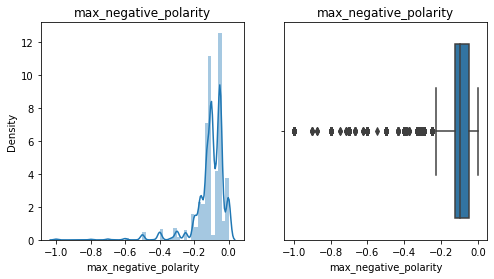

In [63]:
distbox(55,df)

This column represents the maximum polarity of negative words, like others we just discussed this also has values ranging between 0 and 1. We do not believe any data preparation is needed.

### title_subjectivity

Skewness: 0.816085
Kurtosis: -0.540539
count    39644.000000
mean         0.282353
std          0.324247
min          0.000000
25%          0.000000
50%          0.150000
75%          0.500000
max          1.000000
Name: title_subjectivity, dtype: float64
Nullcount: 0.000000


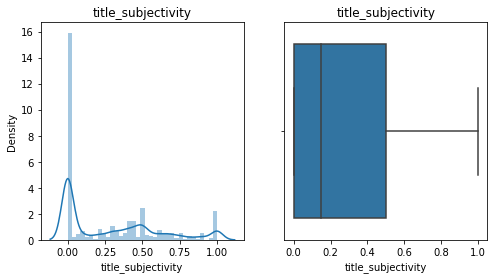

In [64]:
distbox(56,df)

This is a measure of how subjective (vs objective) a title's words are. We do not believe any data preparation is needed.

### title_sentiment_polarity

Skewness: 0.396109
Kurtosis: 3.235477
count    39644.000000
mean         0.071425
std          0.265450
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.150000
max          1.000000
Name: title_sentiment_polarity, dtype: float64
Nullcount: 0.000000


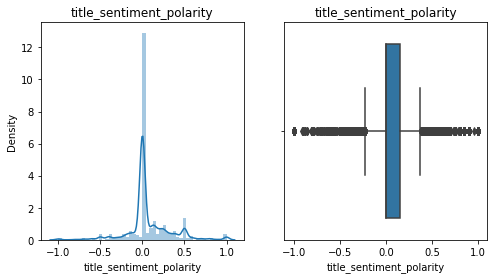

In [65]:
distbox(57,df)

This variable is an analysis of "public opinion" as calculated from extracted and weighted text of the title of the article. It is unimodal and gaussian.

### abs_title_subjectivity

Skewness: -0.624149
Kurtosis: -1.278770
count    39644.000000
mean         0.341843
std          0.188791
min          0.000000
25%          0.166667
50%          0.500000
75%          0.500000
max          0.500000
Name: abs_title_subjectivity, dtype: float64
Nullcount: 0.000000


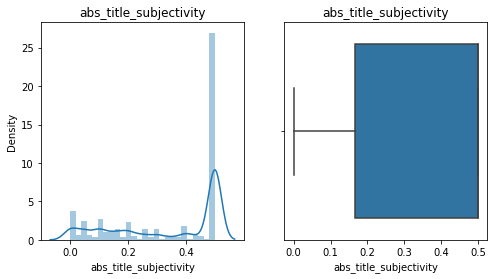

In [66]:
distbox(58,df)

This column contains absolute subjectivity level and has values between 0 and 0.5 with most of the values around the mean. We do not believe any data preparation is needed.

### abs_title_sentiment_polarity

Skewness: 1.704193
Kurtosis: 2.664141
count    39644.000000
mean         0.156064
std          0.226294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: abs_title_sentiment_polarity, dtype: float64
Nullcount: 0.000000


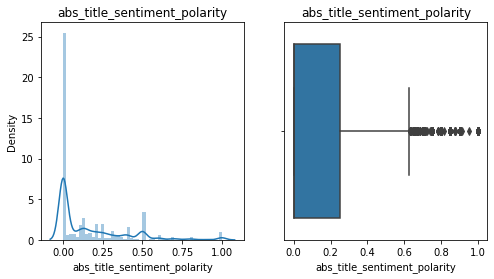

In [67]:
distbox(59,df)

This columns gives us information about absolute polarity level, but there is a spike at 0 and it is right-skewed with values ranging from 0 to 1. We will standardize this value.

## Collinearity Analysis 



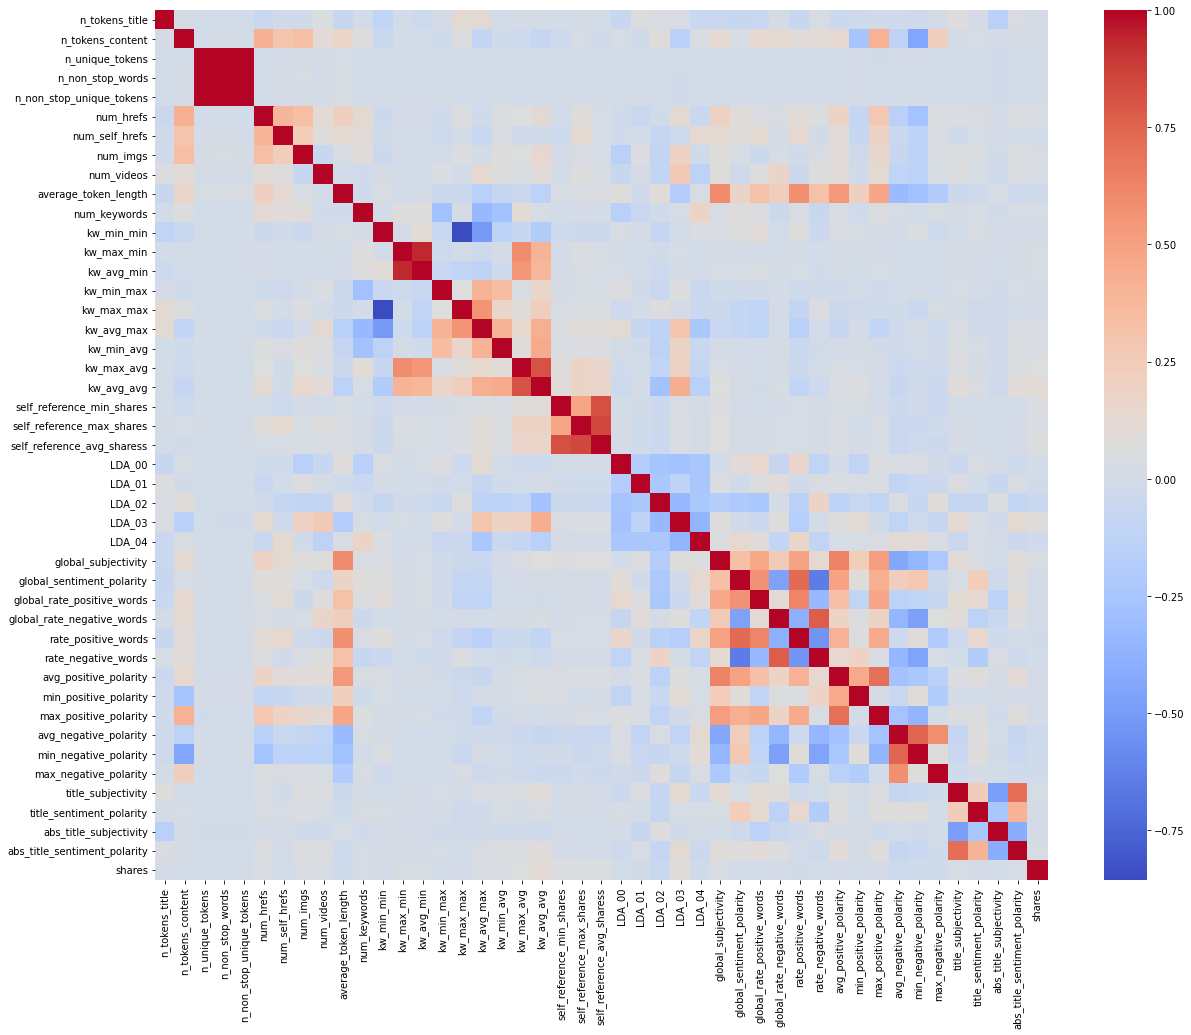

In [68]:
dfc1 = df.iloc[:,2:13]
dfc2 = df.iloc[:,19:31]
dfc3 = df.iloc[:,39:]
dfc = pd.concat([dfc1,dfc2,dfc3],axis=1)
plt.figure(figsize=(20,16))
sns.heatmap(dfc.corr(),cmap='coolwarm',annot=False);

Analysis: 

We see some correlations with the related sets of columns (ie keywords kw_max_max <-> kw_min_min, counts and averages of polarity). We will handle this collinearity later in our notebook by either dropping columns utilizing thresholds or combining features utilizing PCA or other dimensionality reduction techniques.

# Data Preparation

Our first step will be to transform our response variable into a categorical indicator.

Then, we will drop some non predictive columns, drop the identified outlier row, and then transform columns based on our findings above.

**dropping columns**
* url 
* time delta

**dropping a row**
* drop row 21037

**columns to be normalized and standardized:**

* n_tokens_content
* num_hrefs
* num_self_hrefs
* num_imgs
* kw_min_min
* kw_max_min
* kw_avg_min
* kw_min_max
* kw_max_max
* kw_min_avg
* kw_max_avg
* kw_avg_avg
* self_reference_min_shares
* self_reference_max_shares
* self_reference_avg_sharess
* abs_title_sentiment_polarity




In [69]:
# first we initialize a copy of our data frame to persevere the original 
data_prep = df.copy()

## Create TARGET Categorical Indicators
We will create a new categorical indicator variable derived from the content of the share attribute. The new indicator variable named “share_level” will have the following three possible categorizations:
1) `low`: indicates that the number of shares for a given article is less than ½ of the median number of shares for all news articles 
2) `medium`: indicates that the number of shares for a given article is between 0.5 * the median number of shares for all news articles and 1.5 * the median number of shares for all news articles, i.e., (0.5 * median) < number of shares for the articles <= (1.5 * median)  
3) `high`: indicates that the number of shares for a given article exceeds 1.5 * the median number of shares for all news articles 
   

In [70]:
data_prep['shares'].median()

1400.0

In [71]:
data_prep['share_level'] = 'medium'#create a categorization column, and set all values to medium
data_prep.loc[data_prep['shares'] > (1.5 * data_prep['shares'].median()), 'share_level'] = 'high'#set all values greater than 1.5 * median to high
data_prep.loc[data_prep['shares'] < (.5 * data_prep['shares'].median()), 'share_level'] = 'low'#set all values greater than .5 * median to low

In [72]:
#sanity checks

scheck = data_prep.loc[data_prep['share_level'] == 'high', ['share_level','shares']]
print(scheck.iloc [0:2] )
scheck = data_prep.loc[data_prep['share_level'] == 'medium', ['share_level','shares']]
print(scheck.iloc [0:2] )
scheck = data_prep.loc[data_prep['share_level'] == 'low', ['share_level','shares']]
print(scheck.iloc [0:2] )
del scheck

   share_level  shares
8         high    3600
10        high    2200
  share_level  shares
1      medium     711
2      medium    1500
  share_level  shares
0         low     593
4         low     505


We will remove the “share” attribute from our dataframe. This must be done to eliminate the collinearity that will result from the addition of the “share_level” indicator to our collection of attributes. We will also remove the previously identified features that provide no useful information to our response variable.

## Drop Rows & Columns

In [73]:
data_prep.drop(['timedelta', 'url','shares'], axis = 1,inplace=True)#drop the columns
data_prep.drop(index=21037,inplace=True)#drop outlier row

## Normalizing & Scaling

the following columns will now be normalized
* n_tokens_content
* num_hrefs
* num_self_hrefs
* num_imgs
* num_videos
* kw_min_min
* kw_max_min
* kw_avg_min
* kw_min_max
* kw_max_max
* kw_min_avg
* kw_max_avg
* kw_avg_avg
* self_reference_min_shares
* self_reference_max_shares
* self_reference_avg_sharess
* abs_title_sentiment_polarity

In [74]:
columns = ['n_tokens_content','num_hrefs','num_self_hrefs','kw_min_min', 'kw_max_min', 'kw_avg_min','kw_min_max','kw_max_max',
                'kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','self_reference_max_shares',
                'self_reference_avg_sharess','num_imgs','num_videos','abs_title_sentiment_polarity']

for column in columns:#iterate over identified columns
  a = data_prep[[column]]
  data_prep[column] = pt(a,method='yeo-johnson')#we are performing a yeo-johnson transformation because most of the features have negative or 0 values

data_prep[columns].head()#sanity check

n_tokens_content 
 num_hrefs 
 num_self_hrefs 
 kw_min_min 
 kw_max_min 
 kw_avg_min 
 kw_min_max 
 kw_max_max 
 kw_min_avg 
 kw_max_avg 
 kw_avg_avg 
 self_reference_min_shares 
 self_reference_max_shares 
 self_reference_avg_sharess 
 num_imgs 
 num_videos 
 abs_title_sentiment_polarity 
 
 
 
 
 0 
 -0.720951 
 -0.693424 
 -0.149043 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 -1.138613 
 -8.734794 
 -6.804915 
 -0.292271 
 -0.563863 
 -0.512839 
 -0.290053 
 -0.749617 
 0.714352 
 
 
 1 
 -0.582076 
 -0.957421 
 -0.740172 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 -1.138613 
 -8.734794 
 -6.804915 
 -1.723826 
 -1.714057 
 -1.730852 
 -0.290053 
 -0.749617 
 -0.885534 
 
 
 2 
 -0.753694 
 -0.957421 
 -0.740172 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 -1.138613 
 -8.734794 
 -6.804915 
 -0.035267 
 -0.359481 
 -0.284248 
 -0.290053 
 -0.749617 
 -0.885534 
 
 
 3 
 0.213264 
 0.153469 
 -1.767666 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 -1.138613 
 -8.734794 
 -6.804915 
 -1.723826 
 -1.714057 
 -1.730852 
 -0.290053 
 -0.749617 
 -0.885534 
 
 
 4 
 1.214894 
 1.042531 
 2.522411 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 -1.138613 
 -8.734794 
 -6.804915 
 -0.254888 
 0.971403 
 0.271912 
 1.660456 
 -0.749617 
 0.423562

# Prepped Data Review

In [75]:
data_prep

n_tokens_title 
 n_tokens_content 
 n_unique_tokens 
 n_non_stop_words 
 n_non_stop_unique_tokens 
 num_hrefs 
 num_self_hrefs 
 num_imgs 
 num_videos 
 average_token_length 
 num_keywords 
 data_channel_is_lifestyle 
 data_channel_is_entertainment 
 data_channel_is_bus 
 data_channel_is_socmed 
 data_channel_is_tech 
 data_channel_is_world 
 kw_min_min 
 kw_max_min 
 kw_avg_min 
 kw_min_max 
 kw_max_max 
 kw_avg_max 
 kw_min_avg 
 kw_max_avg 
 kw_avg_avg 
 self_reference_min_shares 
 self_reference_max_shares 
 self_reference_avg_sharess 
 weekday_is_monday 
 weekday_is_tuesday 
 weekday_is_wednesday 
 weekday_is_thursday 
 weekday_is_friday 
 weekday_is_saturday 
 weekday_is_sunday 
 is_weekend 
 LDA_00 
 LDA_01 
 LDA_02 
 LDA_03 
 LDA_04 
 global_subjectivity 
 global_sentiment_polarity 
 global_rate_positive_words 
 global_rate_negative_words 
 rate_positive_words 
 rate_negative_words 
 avg_positive_polarity 
 min_positive_polarity 
 max_positive_polarity 
 avg_negative_polarity 
 min_negative_polarity 
 max_negative_polarity 
 title_subjectivity 
 title_sentiment_polarity 
 abs_title_subjectivity 
 abs_title_sentiment_polarity 
 share_level 
 
 
 
 
 0 
 12.0 
 -0.720951 
 0.663594 
 1.0 
 0.815385 
 -0.693424 
 -0.149043 
 -0.290053 
 -0.749617 
 4.680365 
 5.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 0.000000 
 -1.138613 
 -8.734794 
 -6.804915 
 -0.292271 
 -0.563863 
 -0.512839 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.500331 
 0.378279 
 0.040005 
 0.041263 
 0.040123 
 0.521617 
 0.092562 
 0.045662 
 0.013699 
 0.769231 
 0.230769 
 0.378636 
 0.100000 
 0.70 
 -0.350000 
 -0.600 
 -0.200000 
 0.500000 
 -0.187500 
 0.000000 
 0.714352 
 low 
 
 
 1 
 9.0 
 -0.582076 
 0.604743 
 1.0 
 0.791946 
 -0.957421 
 -0.740172 
 -0.290053 
 -0.749617 
 4.913725 
 4.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 0.000000 
 -1.138613 
 -8.734794 
 -6.804915 
 -1.723826 
 -1.714057 
 -1.730852 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.799756 
 0.050047 
 0.050096 
 0.050101 
 0.050001 
 0.341246 
 0.148948 
 0.043137 
 0.015686 
 0.733333 
 0.266667 
 0.286915 
 0.033333 
 0.70 
 -0.118750 
 -0.125 
 -0.100000 
 0.000000 
 0.000000 
 0.500000 
 -0.885534 
 medium 
 
 
 2 
 9.0 
 -0.753694 
 0.575130 
 1.0 
 0.663866 
 -0.957421 
 -0.740172 
 -0.290053 
 -0.749617 
 4.393365 
 6.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 0.000000 
 -1.138613 
 -8.734794 
 -6.804915 
 -0.035267 
 -0.359481 
 -0.284248 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.217792 
 0.033334 
 0.033351 
 0.033334 
 0.682188 
 0.702222 
 0.323333 
 0.056872 
 0.009479 
 0.857143 
 0.142857 
 0.495833 
 0.100000 
 1.00 
 -0.466667 
 -0.800 
 -0.133333 
 0.000000 
 0.000000 
 0.500000 
 -0.885534 
 medium 
 
 
 3 
 9.0 
 0.213264 
 0.503788 
 1.0 
 0.665635 
 0.153469 
 -1.767666 
 -0.290053 
 -0.749617 
 4.404896 
 7.0 
 0.0 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 0.000000 
 -1.138613 
 -8.734794 
 -6.804915 
 -1.723826 
 -1.714057 
 -1.730852 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.028573 
 0.419300 
 0.494651 
 0.028905 
 0.028572 
 0.429850 
 0.100705 
 0.041431 
 0.020716 
 0.666667 
 0.333333 
 0.385965 
 0.136364 
 0.80 
 -0.369697 
 -0.600 
 -0.166667 
 0.000000 
 0.000000 
 0.500000 
 -0.885534 
 medium 
 
 
 4 
 13.0 
 1.214894 
 0.415646 
 1.0 
 0.540890 
 1.042531 
 2.522411 
 1.660456 
 -0.749617 
 4.682836 
 7.0 
 0.0 
 0.0 
 0.0 
 0.0 
 1.0 
 0.0 
 0.119319 
 -3.351863 
 -2.879302 
 -1.108269 
 -2.727207 
 0.000000 
 -1.138613 
 -8.734794 
 -6.804915 
 -0.254888 
 0.971403 
 0.271912 
 1.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.028633 
 0.028794 
 0.028575 
 0.028572 
 0.885427 
 0.513502 
 0.281003 
 0.074627 
 0.012127 
 0.860215 
 0.139785 
 0.411127 
 0.033333 
 1.00 
 -0.220192 
 -0.

### share_level
We will first examine the response variable we created

medium    0.577706
high      0.326792
low       0.095502
Name: share_level, dtype: float64
Nullcount: 0.000000


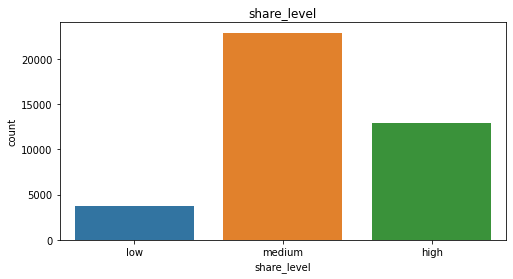

In [76]:
distbox(58,data_prep, 'categorical')

Our target variable is very imbalanced. This is something we will address in the modeling section of this notebook.

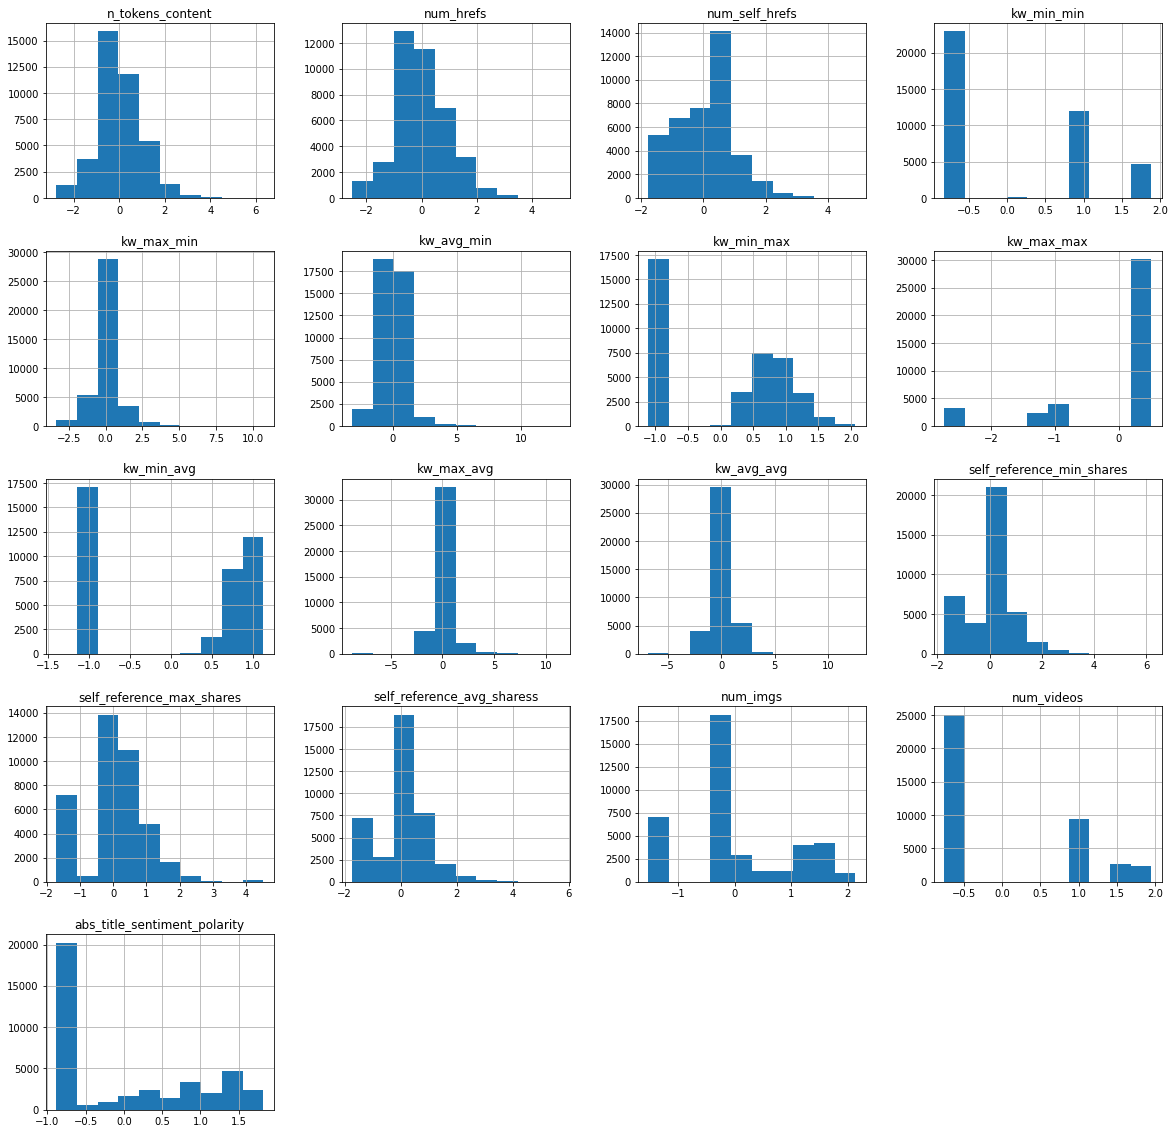

In [77]:
#create histograms for every transformed feature
data_prep[columns].hist(figsize = (20,20));

We will now compare these variables to the untransformed features, to see if we improved the distributions.

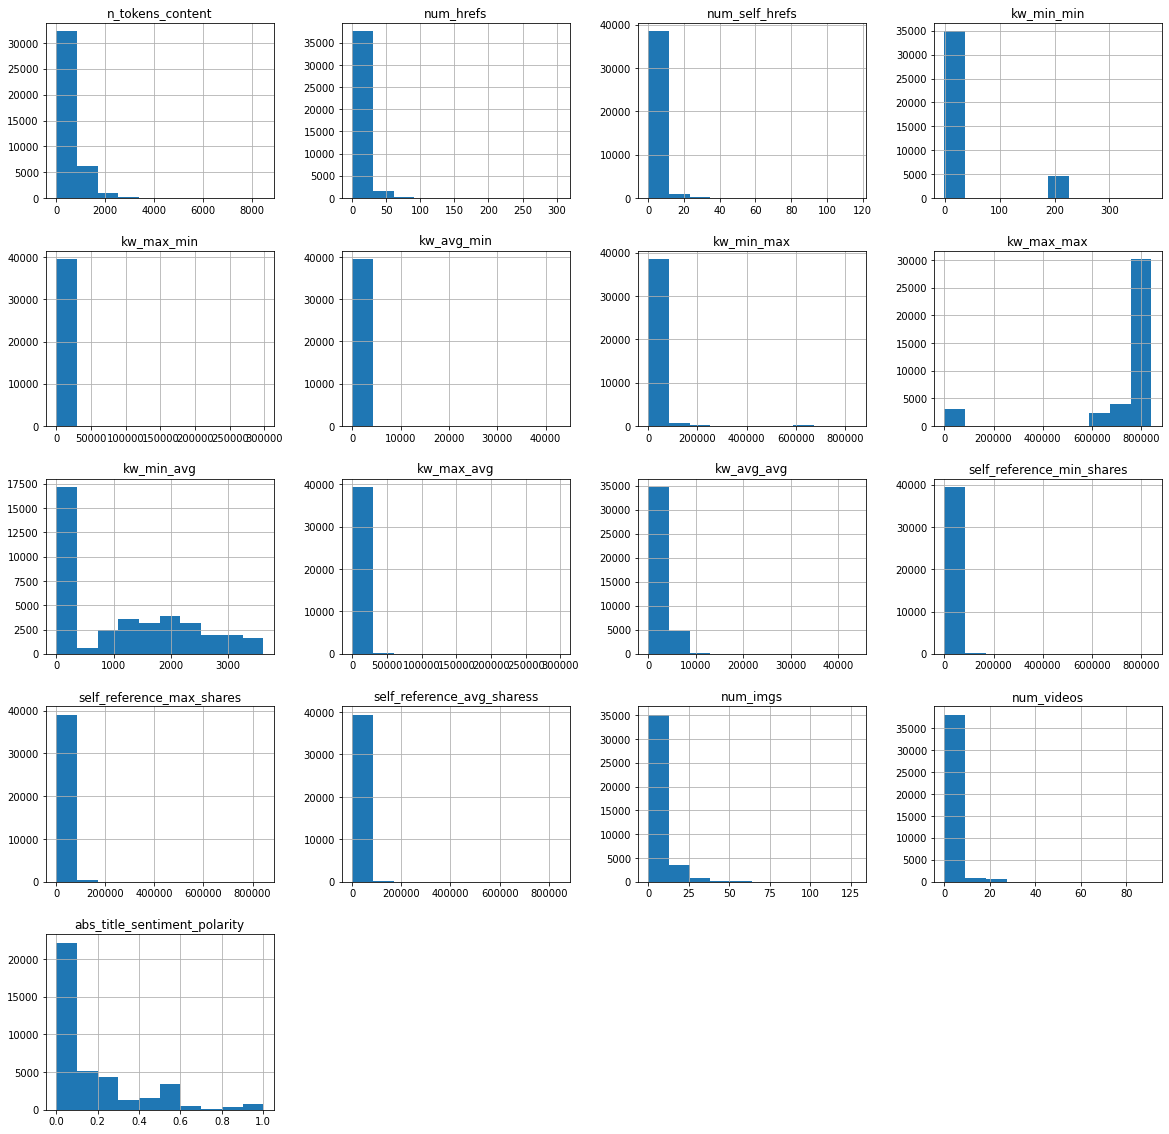

In [78]:
#create histograms for each original transformed feature
df[columns].hist(figsize = (20,20));

Though we believe our transformations are not perfect, they seem to be a substantial improvement over the initial dataset.

# Neural Network Modeling 

We will now create a few different models, which will be differentiated by their hyper-parameters. Model 1 will be created with hyper-parameters chosen based on recommendations that have been characterized as standard in various articles and notebooks. For the second model, we will create a search function to find the "best" set of hyper-parameters programmatically. For the last model, we will add in an additional hyper-parameter on top of the second model to explicitly account for the imbalanced classes in the response variable.


## Feature Selection

Based on our work on the practical challenge in the fourth module (https://github.com/yuleidner/DAV-6150/blob/main/M4/M4_assn.ipynb) we will not perform any feature selection or principal component analysis, which did not improve our models significantly. 

## Train Test Split

In [79]:
# Separate features and response variables. 

X = data_prep.drop(['share_level'], axis = 1)# assign the explanatory variables to a Python object
y = data_prep.share_level# assign the response variable to a Python object

# Produces test split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size= .2,
    random_state=42,
    stratify = y #stratifying to account for sparse classes
    )

## Null Hypothesis
This is a measure of how wrong the classifier would be if it predicted just the majority class. The formula is (Actual:Number/Total Sample).


In [80]:
(len(X_train)-y_train.str.contains('medium').sum())/len(X_train)#total count minus positive count divided by total count

0.422305606356814

In [81]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()#transforming str response variable to a numeric input as the model requires.
label_encoder = label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
label_encoder = label_encoder.fit(y_test)
y_test = label_encoder.transform(y_test)

In [82]:
y_train

We will create dummy versions of the response variable to allow the keras models to function on our string classes.

In [83]:
y_dummy_train = pd.get_dummies(y_train)
y_dummy_test = pd.get_dummies(y_test)

## Model 1
We will build a model with the "best" hyper-parameters we can find for classification, based on standards we find in documentation

In [84]:
#import libraries and double check tf version
import tensorflow as tf
from tensorflow import  keras # removed pip and handled update in datalore env 
import keras_tuner as kt # added to env via datalore env management 
tf.__version__

'2.6.1'

### Building Model

In [85]:
#check shape for input layer
X_train.shape

(31714, 58)

In [86]:
# layers chosen based on https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[ 58]))#input layer with shape of input
model1.add(keras.layers.Dense(90, activation="relu"))#relu is chosen to help prevent vanishing gradient problems and for speed. typically hidden layers have between 10-100 layer acc` to HOML. They are also supposed to be pyramid shaped to funnel information, thus we chose 90>30>3 outputs
model1.add(keras.layers.Dense(30, activation="relu"))#should be fewer than the previous layer
model1.add(keras.layers.Dense(3, activation="softmax"))#3 outputs, one per class. softmax is chosen because the classes are exclusive.

In [87]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 58)                0         
_________________________________________________________________
dense (Dense)                (None, 90)                5310      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2730      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 93        
Total params: 8,133
Trainable params: 8,133
Non-trainable params: 0
_________________________________________________________________


### Training Model

In [88]:
#opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9) # default learning rate .01 
AUC = keras.metrics.AUC()

model1.compile(loss='categorical_crossentropy', # previous value sparse categorical squeezes output space but resulted in worse performance 
              optimizer='adam',#chosen because sgd didn't seem to adjust its learning rate
              metrics=['categorical_accuracy', 'accuracy', AUC])

In [89]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model1.fit(X_train, y_dummy_train, epochs=100,
                    batch_size =5,
                    validation_split=.2,
                    workers=2,
                    callbacks= stop_early
                    )

Epoch 1/100
5075/5075 [==============================] - 9s 2ms/step - loss: 276.2915 - categorical_accuracy: 0.4518 - accuracy: 0.4518 - auc: 0.5919 - val_loss: 466.9255 - val_categorical_accuracy: 0.5713 - val_accuracy: 0.5713 - val_auc: 0.6787
Epoch 2/100
5075/5075 [==============================] - 8s 2ms/step - loss: 49.1638 - categorical_accuracy: 0.4958 - accuracy: 0.4958 - auc: 0.6200 - val_loss: 0.9234 - val_categorical_accuracy: 0.5715 - val_accuracy: 0.5715 - val_auc: 0.7343
Epoch 3/100
5075/5075 [==============================] - 9s 2ms/step - loss: 0.9044 - categorical_accuracy: 0.5791 - accuracy: 0.5791 - auc: 0.7425 - val_loss: 0.9199 - val_categorical_accuracy: 0.5713 - val_accuracy: 0.5713 - val_auc: 0.7342
Epoch 4/100
5075/5075 [==============================] - 10s 2ms/step - loss: 0.9035 - categorical_accuracy: 0.5793 - accuracy: 0.5793 - auc: 0.7417 - val_loss: 0.9198 - val_categorical_accuracy: 0.5718 - val_accuracy: 0.5718 - val_auc: 0.7344
Epoch 5/100
5075/5075 

In [90]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 5075}

In [91]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'accuracy', 'auc', 'val_loss', 'val_categorical_accuracy', 'val_accuracy', 'val_auc'])

### Metrics

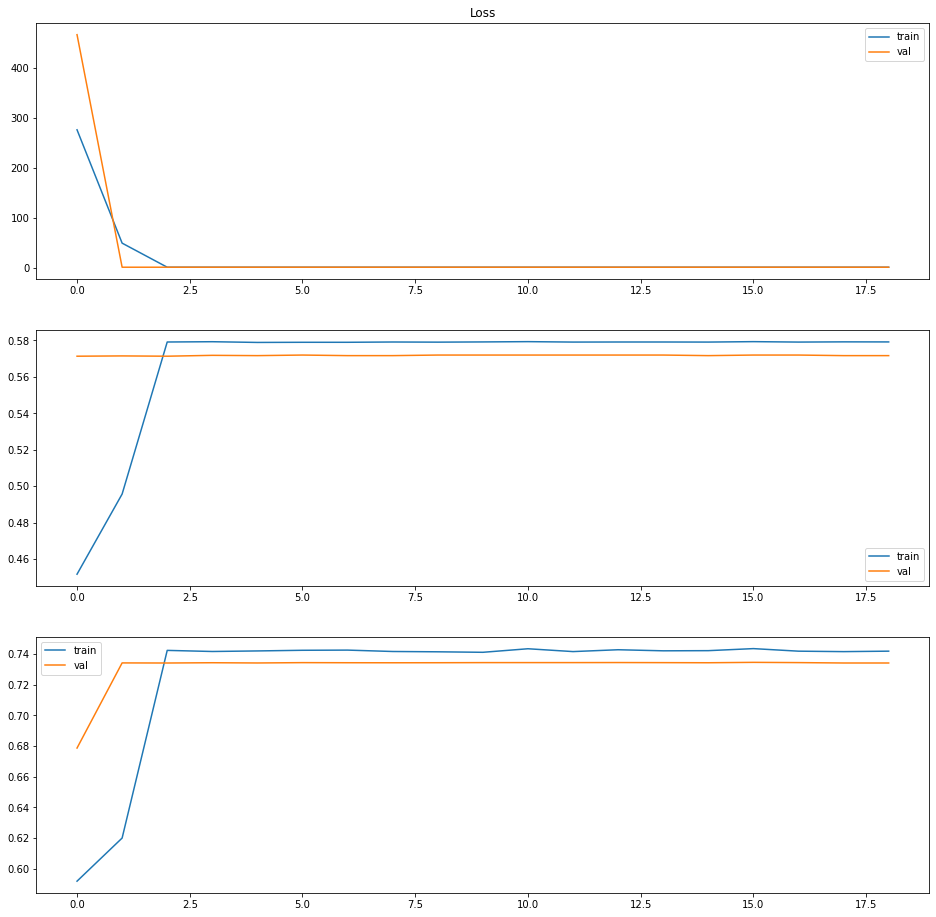

In [92]:
# refernce codoe 
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/


import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
# plot loss during training
plt.subplot(311)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
# plot accuracy during training
plt.subplot(312)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
#plot the AUC during training 
plt.subplot(313)
plt.plot(history.history['auc'], label='train')
plt.plot(history.history['val_auc'], label='val')
plt.legend()
plt.show()

In [93]:
model1.evaluate(X_train, y_dummy_train)

992/992 [==============================] - 1s 1ms/step - loss: 0.9063 - categorical_accuracy: 0.5778 - accuracy: 0.5778 - auc: 0.7414


[0.906293511390686, 0.5778205394744873, 0.5778205394744873, 0.7413851022720337]

In [96]:
from sklearn.metrics import classification_report
pred = model1.predict(X_train)
pred =pred.argmax(axis=1) 
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10364
           1       0.52      0.00      0.01      3029
           2       0.58      1.00      0.73     18321

    accuracy                           0.58     31714
   macro avg       0.37      0.33      0.25     31714
weighted avg       0.38      0.58      0.42     31714



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred)

## Model 2
We will use a fully optimized model utilizing keras_tuners to select hyper-parameters.

https://keras.io/guides/keras_tuner/visualize_tuning/

In order to utilize automated tuning, we must first define the search space by :
- Create a function that builds and returns a compiled model based on inputs
- Utilize a Keras Hyper-parameter object to test and keep track of the testing parameters

  

### Building Search

In [99]:
def build_model(hp):
    # utlizing a feed forward network ie keras sequential 
    model = keras.Sequential()
    
    #input match our data 
    model.add(keras.Input(shape=(58,)))
    
    # Number of layers of the MLP is a hyperparameter.
    for i in range(hp.Int("mlp_layers", 1, 5)):#we are letting it select the optimal number of hidden layers (within our computational allowance for this notebook)
        # Number of units of each layer are
        # different hyperparameters with different names.
        model.add(keras.layers.Dense(
                  units=hp.Int(f"units_{i}", 4, 58, step=6),#step = 6 as a balanace between options and complexity. 58-4=54 is divisble by 6
                  activation=hp.Choice(f"layer_{i}_actfunc",["relu","sigmoid", "tanh"]),)#choose the best activation function
                )

    # The last layer contains 3 units, which is the same as the number of classes
    model.add( keras.layers.Dense(units=3, activation=hp.Choice("final_act",["softmax","sigmoid"])))
    
    # Compile the model.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-1, sampling="log")#.1 is the default and .004 is used to give options
    
    model.compile(
        loss="categorical_crossentropy", 
        metrics=['categorical_accuracy', 'accuracy', AUC], 
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
        )
    
    return model


tuner = kt.Hyperband(build_model,
                     objective=kt.Objective('val_auc', direction='max'), # metric to utlize to decide winning model after each bracket
                     max_epochs=20,
                     factor=3,
                     hyperband_iterations = 2,
                     overwrite=True,  
                     directory='model2',
                     project_name='model2_tuning')

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

build_model(kt.HyperParameters()) #validating that model builds 

### Running Search 

In [100]:
tuner.search(X_train, 
            y_dummy_train, 
            epochs=30, 
            validation_split=0.2, 
            callbacks=[stop_early]
        )

Epoch 5/20
793/793 [==============================] - 1s 2ms/step - loss: 0.9088 - categorical_accuracy: 0.5790 - accuracy: 0.5790 - auc: 0.7426 - val_loss: 0.9197 - val_categorical_accuracy: 0.5712 - val_accuracy: 0.5712 - val_auc: 0.7341
Epoch 6/20
793/793 [==============================] - 1s 2ms/step - loss: 0.9146 - categorical_accuracy: 0.5761 - accuracy: 0.5761 - auc: 0.7398 - val_loss: 0.9201 - val_categorical_accuracy: 0.5720 - val_accuracy: 0.5720 - val_auc: 0.7343
Epoch 7/20
793/793 [==============================] - 1s 2ms/step - loss: 0.9146 - categorical_accuracy: 0.5761 - accuracy: 0.5761 - auc: 0.7429 - val_loss: 0.9346 - val_categorical_accuracy: 0.5712 - val_accuracy: 0.5712 - val_auc: 0.7342
Epoch 8/20
793/793 [==============================] - 1s 2ms/step - loss: 0.9179 - categorical_accuracy: 0.5766 - accuracy: 0.5766 - auc: 0.7415 - val_loss: 0.9223 - val_categorical_accuracy: 0.5720 - val_accuracy: 0.5720 - val_auc: 0.7343
Epoch 9/20
793/793 [====================

### Reviewing Search 

Review our test results:

First we will examine the best hyper-parameters.

In [101]:
best_hp = tuner.get_best_hyperparameters()[0]
best_hp.values

{'mlp_layers': 2,
 'units_0': 16,
 'layer_0_actfunc': 'sigmoid',
 'final_act': 'softmax',
 'lr': 0.01108394015527422,
 'units_1': 40,
 'layer_1_actfunc': 'relu',
 'units_2': 28,
 'layer_2_actfunc': 'tanh',
 'units_3': 40,
 'layer_3_actfunc': 'tanh',
 'units_4': 40,
 'layer_4_actfunc': 'sigmoid',
 'tuner/epochs': 7,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

Our best performing network had 3 hidden layers 

Next, we will look at the summary

In [102]:
tuner.results_summary(num_trials=2)

Results summary
Results in model2/model2_tuning
Showing 2 best trials
Objective(name='val_auc', direction='max')
Trial summary
Hyperparameters:
mlp_layers: 2
units_0: 16
layer_0_actfunc: sigmoid
final_act: softmax
lr: 0.01108394015527422
units_1: 40
layer_1_actfunc: relu
units_2: 28
layer_2_actfunc: tanh
units_3: 40
layer_3_actfunc: tanh
units_4: 40
layer_4_actfunc: sigmoid
tuner/epochs: 7
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.7346394062042236
Trial summary
Hyperparameters:
mlp_layers: 3
units_0: 40
layer_0_actfunc: tanh
final_act: sigmoid
lr: 0.0008234309911814716
units_1: 52
layer_1_actfunc: relu
units_2: 4
layer_2_actfunc: relu
units_3: 40
layer_3_actfunc: tanh
units_4: 10
layer_4_actfunc: relu
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.7346335649490356


### Building Model
This model will be built from the best performing hyper-parameters.

In [103]:
model2 = tuner.hypermodel.build(best_hp)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                944       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                680       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 123       
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [104]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model2.fit(X_train, y_dummy_train, epochs=100,
                    validation_split=.2,
                    workers=-1,
                    callbacks= stop_early
                    )

Epoch 1/100
793/793 [==============================] - 2s 2ms/step - loss: 0.9101 - categorical_accuracy: 0.5785 - accuracy: 0.5785 - auc: 0.7409 - val_loss: 0.9244 - val_categorical_accuracy: 0.5720 - val_accuracy: 0.5720 - val_auc: 0.7345
Epoch 2/100
793/793 [==============================] - 1s 2ms/step - loss: 0.9065 - categorical_accuracy: 0.5791 - accuracy: 0.5791 - auc: 0.7407 - val_loss: 0.9253 - val_categorical_accuracy: 0.5720 - val_accuracy: 0.5720 - val_auc: 0.7345
Epoch 3/100
793/793 [==============================] - 1s 1ms/step - loss: 0.9052 - categorical_accuracy: 0.5792 - accuracy: 0.5792 - auc: 0.7419 - val_loss: 0.9236 - val_categorical_accuracy: 0.5710 - val_accuracy: 0.5710 - val_auc: 0.7340
Epoch 4/100
793/793 [==============================] - 1s 2ms/step - loss: 0.9049 - categorical_accuracy: 0.5791 - accuracy: 0.5791 - auc: 0.7419 - val_loss: 0.9199 - val_categorical_accuracy: 0.5720 - val_accuracy: 0.5720 - val_auc: 0.7345
Epoch 5/100
793/793 [===============

### Metrics

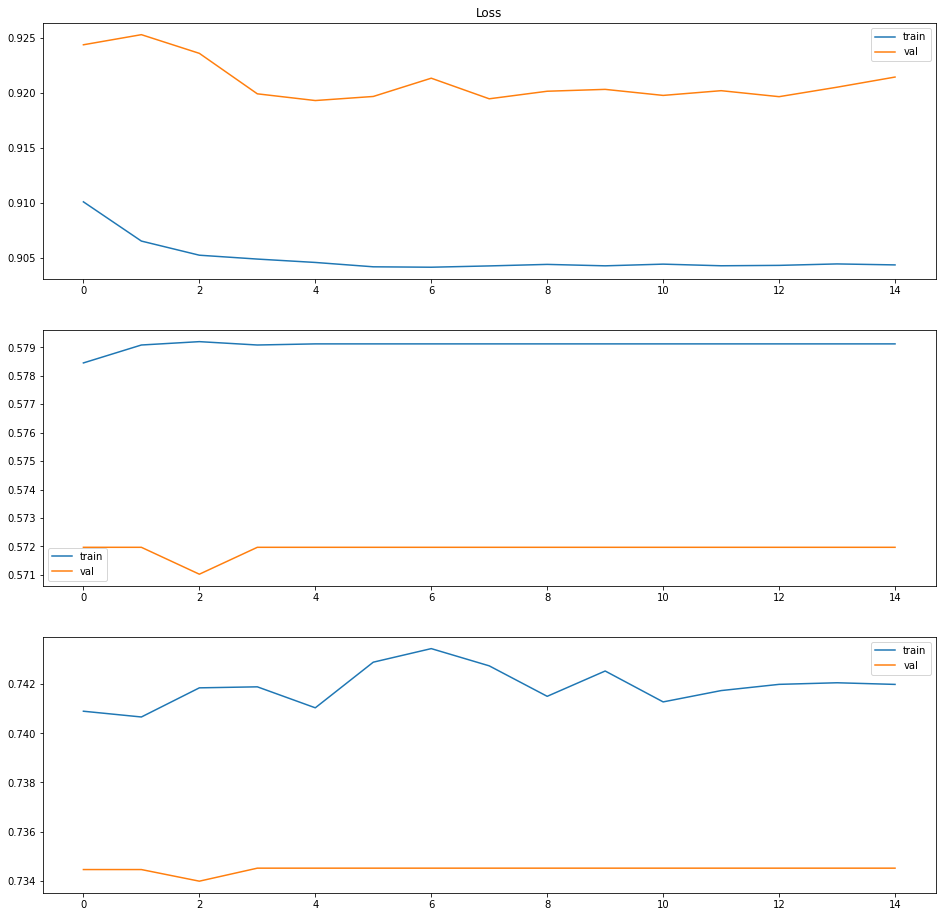

In [105]:
plt.figure(figsize=(16,16))
# plot loss during training
plt.subplot(311)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
# plot accuracy during training
plt.subplot(312)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
#plot the AUC during training 
plt.subplot(313)
plt.plot(history.history['auc'], label='train')
plt.plot(history.history['val_auc'], label='val')
plt.legend()
plt.show()

In [106]:

pred = model2.predict(X_train)
pred =pred.argmax(axis=1)
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10364
           1       0.00      0.00      0.00      3029
           2       0.58      1.00      0.73     18321

    accuracy                           0.58     31714
   macro avg       0.19      0.33      0.24     31714
weighted avg       0.33      0.58      0.42     31714



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
confusion_matrix(y_train,pred)

In [108]:
model2.evaluate(X_train, y_dummy_train)

992/992 [==============================] - 1s 948us/step - loss: 0.9085 - categorical_accuracy: 0.5777 - accuracy: 0.5777 - auc: 0.7411


[0.9085347056388855,
 0.5776944160461426,
 0.5776944160461426,
 0.7410922646522522]

## Model 3
We will modify the previous model by explicitly calling the class weights. Code taken from https://keras.io/examples/structured_data/imbalanced_classification/

### Create Class Weights

In [109]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train),class_weight.compute_class_weight(
                                                  class_weight = 'balanced',
                                                  classes =np.unique(y_train),
                                                  y = y_train)))
class_weights

{0: 1.0200051460182684, 1: 3.4900407175085286, 2: 0.5770063497261795}

### Building Model

In [110]:
model3 = tuner.hypermodel.build(best_hp)
model3.summary()

"""  
s.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[ 58]))#input layer with shape of input
model3.add(keras.layers.Dense(90, activation="relu"))#relu is chosen to help prevent vanishing gradient problems and for speed. typically hidden layers have between 10-100 layer acc` to HOML. They are also supposed to be pyramid shaped to funnel information, thus we chose 90>30>3 outputs
model3.add(keras.layers.Dense(30, activation="relu"))#should be fewer than the previous layer
model3.add(keras.layers.Dense(3, activation="tanh"))#3 outputs, one per class. softmax is chosen because the classes are exclusive.

#opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9) # default learning rate .01 
model3.compile(loss='sparse_categorical_crossentropy', # previous value sparse categorical squeezes output space but resulted in worse performance 
              optimizer='sgd',
              metrics='accuracy')

"""

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                944       
_________________________________________________________________
dense_6 (Dense)              (None, 40)                680       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 123       
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


'  \ns.models.Sequential()\nmodel3.add(keras.layers.Flatten(input_shape=[ 58]))#input layer with shape of input\nmodel3.add(keras.layers.Dense(90, activation="relu"))#relu is chosen to help prevent vanishing gradient problems and for speed. typically hidden layers have between 10-100 layer acc` to HOML. They are also supposed to be pyramid shaped to funnel information, thus we chose 90>30>3 outputs\nmodel3.add(keras.layers.Dense(30, activation="relu"))#should be fewer than the previous layer\nmodel3.add(keras.layers.Dense(3, activation="tanh"))#3 outputs, one per class. softmax is chosen because the classes are exclusive.\n\n#opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9) # default learning rate .01 \nmodel3.compile(loss=\'sparse_categorical_crossentropy\', # previous value sparse categorical squeezes output space but resulted in worse performance \n              optimizer=\'sgd\',\n              metrics=\'accuracy\')\n\n'

### Training Model

In [111]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model3.fit(
    X_train,
    y_dummy_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_split=.2,
    class_weight=class_weights,
    #callbacks= stop_early
)

Epoch 1/100
793/793 [==============================] - 2s 2ms/step - loss: 1.0962 - categorical_accuracy: 0.3674 - accuracy: 0.3674 - auc: 0.6787 - val_loss: 1.1115 - val_categorical_accuracy: 0.1029 - val_accuracy: 0.1029 - val_auc: 0.3271
Epoch 2/100
793/793 [==============================] - 1s 2ms/step - loss: 1.0929 - categorical_accuracy: 0.3850 - accuracy: 0.3850 - auc: 0.5649 - val_loss: 1.0953 - val_categorical_accuracy: 0.5710 - val_accuracy: 0.5710 - val_auc: 0.6718
Epoch 3/100
793/793 [==============================] - 1s 2ms/step - loss: 1.0933 - categorical_accuracy: 0.3794 - accuracy: 0.3794 - auc: 0.5732 - val_loss: 1.1011 - val_categorical_accuracy: 0.3249 - val_accuracy: 0.3249 - val_auc: 0.3211
Epoch 4/100
793/793 [==============================] - 1s 2ms/step - loss: 1.0926 - categorical_accuracy: 0.3592 - accuracy: 0.3592 - auc: 0.5647 - val_loss: 1.1055 - val_categorical_accuracy: 0.3249 - val_accuracy: 0.3249 - val_auc: 0.3765
Epoch 5/100
793/793 [===============

### Metrics

In [112]:
history  = model3.history

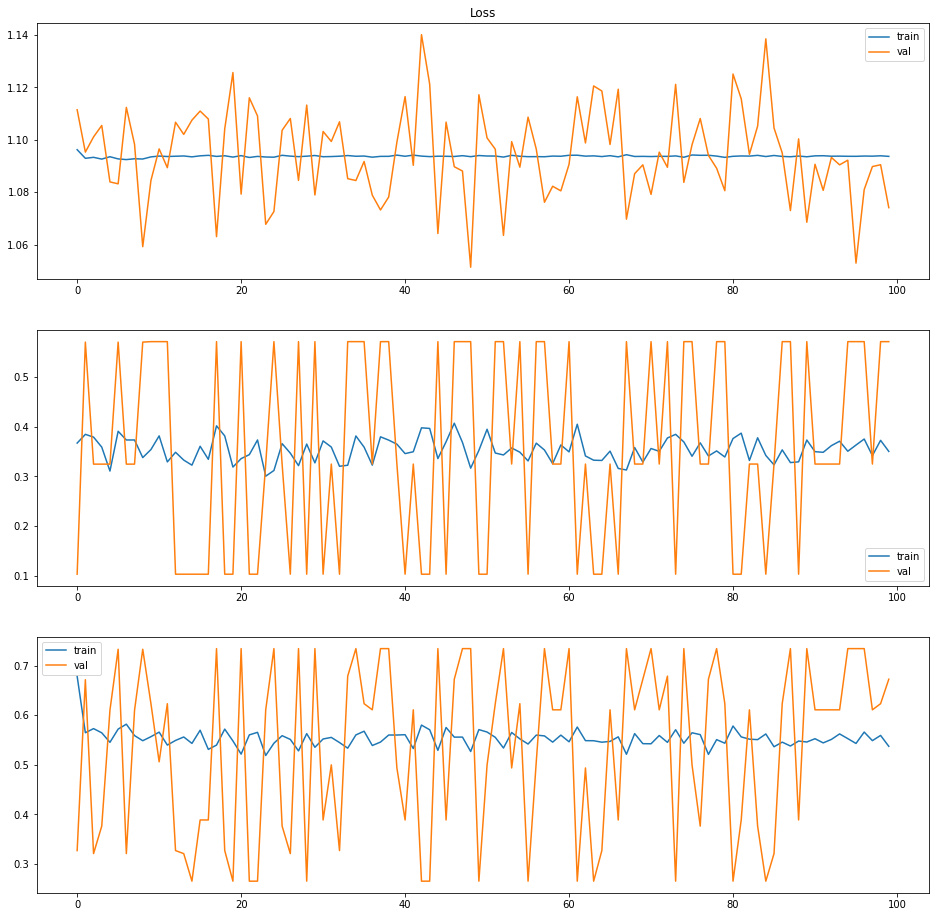

In [114]:
plt.figure(figsize=(16,16))
# plot loss during training
plt.subplot(311)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
# plot accuracy during training
plt.subplot(312)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
#plot the AUC during training 
plt.subplot(313)
plt.plot(history.history['auc'], label='train')
plt.plot(history.history['val_auc'], label='val')
plt.legend()
plt.show()

In [115]:
pred = model3.predict(X_train)
pred =pred.argmax(axis=1)
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10364
           1       0.00      0.00      0.00      3029
           2       0.58      1.00      0.73     18321

    accuracy                           0.58     31714
   macro avg       0.19      0.33      0.24     31714
weighted avg       0.33      0.58      0.42     31714



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
confusion_matrix(y_train,pred)

In [117]:
model3.evaluate(X_train, y_dummy_train)

992/992 [==============================] - 1s 951us/step - loss: 1.0733 - categorical_accuracy: 0.5777 - accuracy: 0.5777 - auc: 0.6784


[1.0732797384262085,
 0.5776944160461426,
 0.5776944160461426,
 0.6783676147460938]

# Model Selection
 

## Model Summary

|      Model      | Accuracy   |   F1    |  AUC   | 
|       :-:       |    :-:     |   :-:   |   :--: |
| Null Error Rate |   .422     |    -    |   -    |  
|     Model 1     |   .5776    |  .42    | .7408  |
|     Model 2     |   .5778    |  .42    | .7413  |
|     Model 3     |   .180     |  .17    | .376   |

Although Model 2 had higher score accuracy and AUC scores than Model 1, it was extremely computationally expensive. We will select Model 1 as our prefered model.

In [118]:
model1.evaluate(X_test, y_dummy_test)

248/248 [==============================] - 0s 1ms/step - loss: 0.9064 - categorical_accuracy: 0.5779 - accuracy: 0.5779 - auc: 0.7416


[0.9063766598701477,
 0.5778786540031433,
 0.5778786540031433,
 0.7415755391120911]

In [119]:
pred = model1.predict(X_test)
pred =pred.argmax(axis=1) 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2591
           1       0.33      0.01      0.01       757
           2       0.58      1.00      0.73      4581

    accuracy                           0.58      7929
   macro avg       0.30      0.33      0.25      7929
weighted avg       0.37      0.58      0.42      7929



/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The scoring on our testing data that we withheld matches the training data. The AUC even increases slightly to .7416 which is the highest score yet. This validates that our model generalizes to unseen data.

# Conclusion

Overall, we were surprised by how little the models seemed to improve over each iteration. We saw weights adjusted and loss minimized, but no great improvement in the accuracy or AUC scores. 

Model 2 improved slightly over Model 1, but took significantly longer to run. We would recommend sticking with "best" practices as recommended by textbooks and other official sources to determine our hyper-parameters in the future.

We thought Model 3 would have the best metrics but were surprised at how poorly it performed. It was worse than the null error rate! We believe it performed worse overall because it started training for all classes more evenly, whereas the other models mostly ignored the smaller classes. We believe this model should be focused on in future work, and holds the greatest potential.$$  $$